You are working for an airline company looking to enter the United States domestic market.
Specifically, the company has decided to start with 5 round trip routes between medium and
large US airports. An example of a round trip route is the combination of JFK to ORD and ORD
to JFK. The airline company has to acquire 5 new airplanes (one per round trip route) and the
upfront cost for each airplane is $90 million. The company’s motto is “On time, for you”, so
punctuality is a big part of its brand image.
You have been tasked with analyzing 1Q2019 data to identify:

1. The 10 busiest round trip routes in terms of number of round trip flights in the quarter.
Exclude canceled flights when performing the calculation.<br><br>

2. The 10 most profitable round trip routes (without considering the upfront airplane cost) in
the quarter. Along with the profit, show total revenue, total cost, summary values of
other key components and total round trip flights in the quarter for the top 10 most
profitable routes. Exclude canceled flights from these calculations.<br><br>

3. The 5 round trip routes that you recommend to invest in based on any factors that you
choose.<br><br>

4. The number of round trip flights it will take to breakeven on the upfront airplane cost for
each of the 5 round trip routes that you recommend. Print key summary components for
these routes.<br><br>

5. Key Performance Indicators (KPI’s) that you recommend tracking in the future to
measure the success of the round trip routes that you recommend.<br><br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import FuncFormatter
import statistics

In [2]:
file_path = '/Users/jean_taylor_1/Downloads/data/'

## 1.0 - Understand data sources provided

## 1.1 - Understand Airport Codes.csv<h2>

In [3]:
airport_codes = pd.read_csv(file_path + 'Airport_Codes.csv')

In [4]:
airport_codes.head(10)

,TYPE,NAME,ELEVATION_FT,CONTINENT,ISO_COUNTRY,MUNICIPALITY,IATA_CODE,COORDINATES
0,heliport,Total Rf Heliport,11.0,NaN,US,Bensalem,NaN,"-74.93360137939453, 40.07080078125"
1,small_airport,Aero B Ranch Airport,3435.0,NaN,US,Leoti,NaN,"-101.473911, 38.704022"
2,small_airport,Lowell Field,450.0,NaN,US,Anchor Point,NaN,"-151.695999146, 59.94919968"
3,small_airport,Epps Airpark,820.0,NaN,US,Harvest,NaN,"-86.77030181884766, 34.86479949951172"
4,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,Newport,NaN,"-91.254898, 35.6087"
5,small_airport,Fulton Airport,1100.0,NaN,US,Alex,NaN,"-97.8180194, 34.9428028"
6,small_airport,Cordes Airport,3810.0,NaN,US,Cordes,NaN,"-112.16500091552734, 34.305599212646484"
7,small_airport,Goldstone /Gts/ Airport,3038.0,NaN,US,Barstow,NaN,"-116.888000488, 35.350498199499995"
8,small_airport,Williams Ag Airport,87.0,NaN,US,Biggs,NaN,"-121.763427, 39.427188"
9,heliport,Kitchen Creek Helibase Heliport,3350.0,NaN,US,Pine Valley,NaN,"-116.4597417, 32.7273736"


In [5]:
airport_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55369 entries, 0 to 55368
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TYPE          55369 non-null  object 
 1   NAME          55369 non-null  object 
 2   ELEVATION_FT  48354 non-null  float64
 3   CONTINENT     27526 non-null  object 
 4   ISO_COUNTRY   55122 non-null  object 
 5   MUNICIPALITY  49663 non-null  object 
 6   IATA_CODE     9182 non-null   object 
 7   COORDINATES   55369 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.4+ MB


## 1.2 - Understand Flights.csv

In [6]:
flights = pd.read_csv(file_path + 'Flights.csv')

/var/folders/9b/4_3pqpvx3fs3ccpkbgvs21n40000gp/T/ipykernel_12590/3083784813.py:1: DtypeWarning: Columns (3,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv(file_path + 'Flights.csv')


In [7]:
flights.head(100)

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE
0,2019-03-02,WN,N955WN,4591,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-8.0,-6.0,0.0,143.0,1025.0,0.97
1,2019-03-02,WN,N8686A,3231,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",1.0,5.0,0.0,135.0,930.0,0.55
2,2019-03-02,WN,N201LV,3383,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",0.0,4.0,0.0,132.0,930.0,0.91
3,2019-03-02,WN,N413WN,5498,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",11.0,14.0,0.0,136.0,930.0,0.67
4,2019-03-02,WN,N7832A,6933,14635,RSW,"Fort Myers, FL",11259,DAL,"Dallas, TX",0.0,-17.0,0.0,151.0,1005.0,0.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2019-03-02,WN,N8652B,2516,14679,SAN,"San Diego, CA",14893,SMF,"Sacramento, CA",-5.0,-10.0,0.0,76.0,480.0,0.36
96,2019-03-02,WN,N8671D,2789,14679,SAN,"San Diego, CA",14893,SMF,"Sacramento, CA",35.0,32.0,0.0,74.0,480.0,0.70
97,2019-03-02,WN,N966WN,3468,14679,SAN,"San Diego, CA",14893,SMF,"Sacramento, CA",2.0,0.0,0.0,72.0,480.0,0.87
98,2019-03-02,WN,N906WN,3544,14679,SAN,"San Diego, CA",14893,SMF,"Sacramento, CA",-1.0,-11.0,0.0,69.0,480.0,0.44


In [8]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915886 entries, 0 to 1915885
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   FL_DATE            object 
 1   OP_CARRIER         object 
 2   TAIL_NUM           object 
 3   OP_CARRIER_FL_NUM  object 
 4   ORIGIN_AIRPORT_ID  int64  
 5   ORIGIN             object 
 6   ORIGIN_CITY_NAME   object 
 7   DEST_AIRPORT_ID    int64  
 8   DESTINATION        object 
 9   DEST_CITY_NAME     object 
 10  DEP_DELAY          float64
 11  ARR_DELAY          float64
 12  CANCELLED          float64
 13  AIR_TIME           object 
 14  DISTANCE           object 
 15  OCCUPANCY_RATE     float64
dtypes: float64(4), int64(2), object(10)
memory usage: 233.9+ MB


In [9]:
flights.isnull().sum()

FL_DATE                  0
OP_CARRIER               0
TAIL_NUM             12156
OP_CARRIER_FL_NUM        0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
ORIGIN_CITY_NAME         0
DEST_AIRPORT_ID          0
DESTINATION              0
DEST_CITY_NAME           0
DEP_DELAY            50351
ARR_DELAY            55991
CANCELLED                0
AIR_TIME             56551
DISTANCE               630
OCCUPANCY_RATE         310
dtype: int64

## 1.2 - Understand Tickets.csv

In [10]:
tickets = pd.read_csv(file_path + 'Tickets.csv')

In [11]:
tickets.head(100)

,ITIN_ID,YEAR,QUARTER,ORIGIN,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION
0,201912723049,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,736.0,DAB
1,201912723085,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,570.0,COS
2,201912723491,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,564.0,MCO
3,201912723428,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,345.0,LGA
4,201912723509,2019,1,ABI,US,TX,Texas,0.0,MQ,1.0,309.0,MGM
...,...,...,...,...,...,...,...,...,...,...,...,...
95,201912723177,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,1332.0,EGE
96,201912723009,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,409.0,BWI
97,201912723372,2019,1,ABI,US,TX,Texas,1.0,MQ,4.0,678.0,LAS
98,201912723367,2019,1,ABI,US,TX,Texas,1.0,MQ,1.0,548.0,LAS


In [12]:
tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167285 entries, 0 to 1167284
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   ITIN_ID            1167285 non-null  int64  
 1   YEAR               1167285 non-null  int64  
 2   QUARTER            1167285 non-null  int64  
 3   ORIGIN             1167285 non-null  object 
 4   ORIGIN_COUNTRY     1167285 non-null  object 
 5   ORIGIN_STATE_ABR   1167285 non-null  object 
 6   ORIGIN_STATE_NM    1167285 non-null  object 
 7   ROUNDTRIP          1167285 non-null  float64
 8   REPORTING_CARRIER  1167285 non-null  object 
 9   PASSENGERS         1165308 non-null  float64
 10  ITIN_FARE          1166325 non-null  object 
 11  DESTINATION        1167285 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 106.9+ MB


In [13]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915886 entries, 0 to 1915885
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   FL_DATE            object 
 1   OP_CARRIER         object 
 2   TAIL_NUM           object 
 3   OP_CARRIER_FL_NUM  object 
 4   ORIGIN_AIRPORT_ID  int64  
 5   ORIGIN             object 
 6   ORIGIN_CITY_NAME   object 
 7   DEST_AIRPORT_ID    int64  
 8   DESTINATION        object 
 9   DEST_CITY_NAME     object 
 10  DEP_DELAY          float64
 11  ARR_DELAY          float64
 12  CANCELLED          float64
 13  AIR_TIME           object 
 14  DISTANCE           object 
 15  OCCUPANCY_RATE     float64
dtypes: float64(4), int64(2), object(10)
memory usage: 233.9+ MB


In [14]:
flights.duplicated().sum()

4545

In [15]:
flights_cleaned = flights.drop_duplicates(keep = 'first')

In [16]:
# Retain info we need
flights_cleaned = flights_cleaned[['FL_DATE', 'ORIGIN', 'DESTINATION','DEP_DELAY', 'ARR_DELAY', 'DISTANCE',\
                    'OCCUPANCY_RATE','CANCELLED']]

In [17]:
# I see above there is a date formating issue. Lets look into these date values
flights_cleaned['FL_DATE'].unique()

array(['2019-03-02', '2019-03-03', '2019-03-09', '2019-03-10',
       '2019-03-24', '2019-03-28', '2019-03-29', '2019-03-30',
       '2019-03-20', '2019-03-25', '2019-03-26', '2019-03-31',
       '2019-03-13', '2019-03-14', '2019-03-12', '2019-03-11',
       '2019-03-15', '2019-03-16', '2019-03-17', '2019-03-18',
       '2019-03-19', '2019-03-21', '2019-03-22', '2019-03-23',
       '2019-03-27', '2019-03-01', '2019-03-04', '2019-03-05',
       '2019-03-06', '2019-03-07', '2019-03-08', '2019-02-17',
       '2019-02-18', '2019-02-19', '2019-02-20', '2019-02-21',
       '2019-02-22', '2019-02-23', '2019-02-24', '2019-02-25',
       '2019-02-26', '2019-02-27', '2019-02-28', '2019-02-01',
       '2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05',
       '2019-02-06', '2019-02-07', '2019-02-08', '2019-02-09',
       '2019-02-10', '2019-02-11', '2019-02-12', '2019-02-13',
       '2019-02-14', '2019-02-15', '2019-02-16', '2019-01-21',
       '2019-01-24', '2019-01-25', '2019-01-26', '2019-

In [18]:
flights_cleaned['FL_DATE'] = pd.to_datetime(flights_cleaned['FL_DATE'])

In [19]:
flights_cleaned['FL_DATE'].unique()

array(['2019-03-02T00:00:00.000000000', '2019-03-03T00:00:00.000000000',
       '2019-03-09T00:00:00.000000000', '2019-03-10T00:00:00.000000000',
       '2019-03-24T00:00:00.000000000', '2019-03-28T00:00:00.000000000',
       '2019-03-29T00:00:00.000000000', '2019-03-30T00:00:00.000000000',
       '2019-03-20T00:00:00.000000000', '2019-03-25T00:00:00.000000000',
       '2019-03-26T00:00:00.000000000', '2019-03-31T00:00:00.000000000',
       '2019-03-13T00:00:00.000000000', '2019-03-14T00:00:00.000000000',
       '2019-03-12T00:00:00.000000000', '2019-03-11T00:00:00.000000000',
       '2019-03-15T00:00:00.000000000', '2019-03-16T00:00:00.000000000',
       '2019-03-17T00:00:00.000000000', '2019-03-18T00:00:00.000000000',
       '2019-03-19T00:00:00.000000000', '2019-03-21T00:00:00.000000000',
       '2019-03-22T00:00:00.000000000', '2019-03-23T00:00:00.000000000',
       '2019-03-27T00:00:00.000000000', '2019-03-01T00:00:00.000000000',
       '2019-03-04T00:00:00.000000000', '2019-03-05

In [20]:
flights_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1911341 entries, 0 to 1911340
Data columns (total 8 columns):
 #   Column          Dtype         
---  ------          -----         
 0   FL_DATE         datetime64[ns]
 1   ORIGIN          object        
 2   DESTINATION     object        
 3   DEP_DELAY       float64       
 4   ARR_DELAY       float64       
 5   DISTANCE        object        
 6   OCCUPANCY_RATE  float64       
 7   CANCELLED       float64       
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 131.2+ MB


In [21]:
def columns_to_dtype_int32(df, columns):
    for cols in columns:
        df[cols] = df[cols].astype('int32')
    return df

def columns_to_numeric(df, columns):
    for cols in columns:
        df[cols] = pd.to_numeric(df[cols], errors='coerce')
    return df

In [22]:
flights_cleaned = columns_to_numeric(flights_cleaned, ('DEP_DELAY', 'ARR_DELAY', 'DISTANCE'))

In [23]:
flights_cleaned.isnull().sum()

FL_DATE               0
ORIGIN                0
DESTINATION           0
DEP_DELAY         50216
ARR_DELAY         55847
DISTANCE            274
OCCUPANCY_RATE       31
CANCELLED             0
dtype: int64

In [24]:
def boxplots_for_columns(df, df_columns):
    for cols in df_columns:
        plt.figure(figsize=(5, 5))
        plt.boxplot(df[[cols]].dropna(), vert=False, patch_artist=True)
        plt.title('Boxplot for ' + cols)
        plt.xlabel(cols)
        plt.tight_layout()
        plt.show()


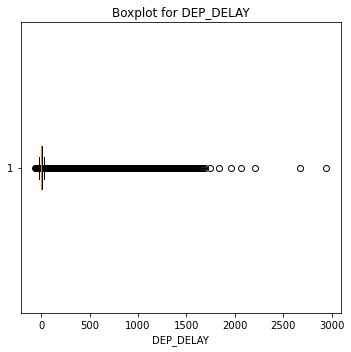

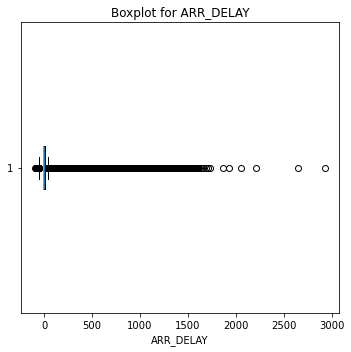

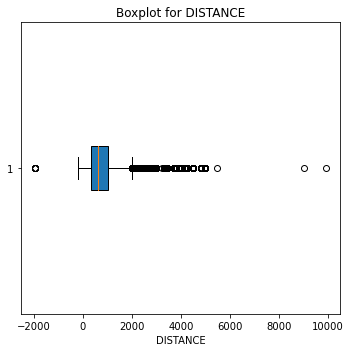

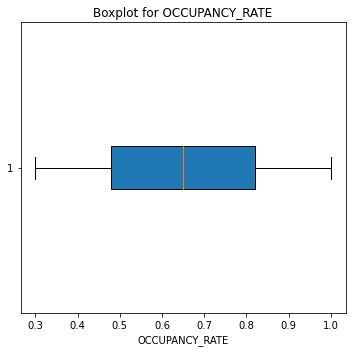

In [25]:
boxplots_for_columns(flights_cleaned, ('DEP_DELAY', 'ARR_DELAY', 'DISTANCE', 'OCCUPANCY_RATE'))

We will fill NaNs for `DEP_DELAY`, `ARR_DELAY` and `DISTANCE` with their median value since they have skew.<br>
We will fill `OCCUPANCY_RATE` with its mean since it appears normally distributed.

In [26]:
def fill_NaNs_with_median(df, columns):
    for cols in columns:
        values_without_NaNs = df[cols].dropna().tolist()
        median_value = statistics.median(values_without_NaNs)
        df[cols].fillna(median_value, inplace=True)

def fill_NaNs_with_mean(df, columns):
    for cols in columns:
        values_without_NaNs = df[cols].dropna().tolist()
        mean_value = statistics.mean(values_without_NaNs)
        df[cols].fillna(mean_value, inplace=True)
    

Before we do that, I do see there is a `DISTANCE` value that is `-2000` roughly. I am assuming that is meant to be positive.

In [27]:
min_val = flights_cleaned['DISTANCE'].min()

# Check if it's negative

# Get index of the most negative value
idx = flights_cleaned['DISTANCE'].idxmin()

print(flights_cleaned['DISTANCE'].idxmin())
# Replace it with its absolute value
flights_cleaned.at[idx, 'DISTANCE'] = abs(min_val)
print(flights_cleaned['DISTANCE'].min())




1910957
-1947.0


In [28]:
def describe_columns(df, columns):
    descriptions = {}
    for cols in columns:
        descriptions[cols] = df[cols].describe()
    
    summary_df = pd.DataFrame(descriptions).T  # Transpose so columns become rows
    
    return summary_df.style.format("{:.4f}")  # Optional formatting

In [29]:
describe_columns(flights_cleaned, ('DEP_DELAY', 'ARR_DELAY', 'DISTANCE', 'OCCUPANCY_RATE'))

,count,mean,std,min,25%,50%,75%,max
DEP_DELAY,1861125.0000,10.8136,50.1858,-63.0000,-6.0000,-2.0000,7.0000,2941.0000
ARR_DELAY,1855494.0000,5.6602,52.4316,-94.0000,-15.0000,-6.0000,8.0000,2923.0000
DISTANCE,1911067.0000,768.1987,579.4008,-1947.0000,342.0000,606.0000,1010.0000,9898.0000
OCCUPANCY_RATE,1911310.0000,0.6502,0.2020,0.3000,0.4800,0.6500,0.8200,1.0000


According to the `Flights.csv` metadata: `DEP_DELAY` and `ARR_DELAY` may not be actual delays but the time delta between the scheduled time and actual time it occured. This explains the negative values.

In [30]:
fill_NaNs_with_median(flights_cleaned, ('DEP_DELAY', 'ARR_DELAY', 'DISTANCE'))
fill_NaNs_with_mean(flights_cleaned, ['OCCUPANCY_RATE'])

In [31]:
flights_cleaned.isnull().sum()


FL_DATE           0
ORIGIN            0
DESTINATION       0
DEP_DELAY         0
ARR_DELAY         0
DISTANCE          0
OCCUPANCY_RATE    0
CANCELLED         0
dtype: int64

In [32]:
flights_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1911341 entries, 0 to 1911340
Data columns (total 8 columns):
 #   Column          Dtype         
---  ------          -----         
 0   FL_DATE         datetime64[ns]
 1   ORIGIN          object        
 2   DESTINATION     object        
 3   DEP_DELAY       float64       
 4   ARR_DELAY       float64       
 5   DISTANCE        float64       
 6   OCCUPANCY_RATE  float64       
 7   CANCELLED       float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 195.7+ MB


In [33]:
# Create function that accepts columns and turns them into 'category' dtype
def get_columns_to_category(df, columns):

    for cols in columns:
        if cols in df.columns:
            try:
                df[cols] = df[cols].astype('category')
            except Exception as e:
                print(f"Error converting column '{cols}' to category: {e}")
        else:
            print(f"Warning: Column '{cols}' not found in DataFrame.")
    return df


In [34]:
# Convert airport 3 digit code data type from object to category for memory usage
flights_cleaned = get_columns_to_category(flights_cleaned, ['ORIGIN', 'DESTINATION'])

flights_cleaned = columns_to_dtype_int32(flights_cleaned, ['DEP_DELAY', 'ARR_DELAY', 'DISTANCE'])

flights_cleaned['CANCELLED'] = flights_cleaned['CANCELLED'].astype('bool')

In [35]:
flights_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1911341 entries, 0 to 1911340
Data columns (total 8 columns):
 #   Column          Dtype         
---  ------          -----         
 0   FL_DATE         datetime64[ns]
 1   ORIGIN          category      
 2   DESTINATION     category      
 3   DEP_DELAY       int32         
 4   ARR_DELAY       int32         
 5   DISTANCE        int32         
 6   OCCUPANCY_RATE  float64       
 7   CANCELLED       bool          
dtypes: bool(1), category(2), datetime64[ns](1), float64(1), int32(3)
memory usage: 139.3 MB


In [36]:
flights_cleaned['CANCELLED'].value_counts()

False    1859862
True       51479
Name: CANCELLED, dtype: int64

In [37]:
flights_cleaned = flights_cleaned[flights_cleaned['CANCELLED'] == False]

In [38]:
flights_cleaned['CANCELLED'].value_counts()

False    1859862
Name: CANCELLED, dtype: int64

In [39]:
flights_cleaned = flights_cleaned.drop('CANCELLED', axis=1).reset_index(drop=True)

In [40]:
flights_cleaned

,FL_DATE,ORIGIN,DESTINATION,DEP_DELAY,ARR_DELAY,DISTANCE,OCCUPANCY_RATE
0,2019-03-02,RSW,CLE,-8,-6,1025,0.970000
1,2019-03-02,RSW,CMH,1,5,930,0.550000
2,2019-03-02,RSW,CMH,0,4,930,0.910000
3,2019-03-02,RSW,CMH,11,14,930,0.670000
4,2019-03-02,RSW,DAL,0,-17,1005,0.620000
...,...,...,...,...,...,...,...
1859857,2019-03-23,TUL,CLT,-9,-6,606,0.794884
1859858,2019-03-24,TUL,CLT,-2,-1,606,0.538399
1859859,2019-03-25,TUL,CLT,-8,-25,606,0.955579
1859860,2019-03-26,TUL,CLT,-9,-6,606,0.595344


Merging Airport codes data to include airport size

In [41]:
airport_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55369 entries, 0 to 55368
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TYPE          55369 non-null  object 
 1   NAME          55369 non-null  object 
 2   ELEVATION_FT  48354 non-null  float64
 3   CONTINENT     27526 non-null  object 
 4   ISO_COUNTRY   55122 non-null  object 
 5   MUNICIPALITY  49663 non-null  object 
 6   IATA_CODE     9182 non-null   object 
 7   COORDINATES   55369 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.4+ MB


In [42]:
airport_codes.isnull().sum()

TYPE                0
NAME                0
ELEVATION_FT     7015
CONTINENT       27843
ISO_COUNTRY       247
MUNICIPALITY     5706
IATA_CODE       46187
COORDINATES         0
dtype: int64

In [43]:
flights_airpot_code_merged = flights_cleaned.join(airport_codes.set_index('IATA_CODE')['TYPE'], on='ORIGIN')\
                                                                .rename(columns={'TYPE': 'ORIGIN_TYPE'})

flights_airpot_code_merged = flights_airpot_code_merged.join(airport_codes.set_index('IATA_CODE')['TYPE'], on='DESTINATION')\
                                                                .rename(columns={'TYPE': 'DESTINATION_TYPE'})

In [44]:
flights_airpot_code_merged

,FL_DATE,ORIGIN,DESTINATION,DEP_DELAY,ARR_DELAY,DISTANCE,OCCUPANCY_RATE,ORIGIN_TYPE,DESTINATION_TYPE
0,2019-03-02,RSW,CLE,-8,-6,1025,0.970000,large_airport,large_airport
1,2019-03-02,RSW,CMH,1,5,930,0.550000,large_airport,large_airport
2,2019-03-02,RSW,CMH,0,4,930,0.910000,large_airport,large_airport
3,2019-03-02,RSW,CMH,11,14,930,0.670000,large_airport,large_airport
4,2019-03-02,RSW,DAL,0,-17,1005,0.620000,large_airport,large_airport
...,...,...,...,...,...,...,...,...,...
1859857,2019-03-23,TUL,CLT,-9,-6,606,0.794884,large_airport,large_airport
1859858,2019-03-24,TUL,CLT,-2,-1,606,0.538399,large_airport,large_airport
1859859,2019-03-25,TUL,CLT,-8,-25,606,0.955579,large_airport,large_airport
1859860,2019-03-26,TUL,CLT,-9,-6,606,0.595344,large_airport,large_airport


In [45]:
flights_airpot_code_merged.isnull().sum()

FL_DATE             0
ORIGIN              0
DESTINATION         0
DEP_DELAY           0
ARR_DELAY           0
DISTANCE            0
OCCUPANCY_RATE      0
ORIGIN_TYPE         0
DESTINATION_TYPE    0
dtype: int64

In [46]:
flights_airpot_code_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1890079 entries, 0 to 1859861
Data columns (total 9 columns):
 #   Column            Dtype         
---  ------            -----         
 0   FL_DATE           datetime64[ns]
 1   ORIGIN            object        
 2   DESTINATION       object        
 3   DEP_DELAY         int32         
 4   ARR_DELAY         int32         
 5   DISTANCE          int32         
 6   OCCUPANCY_RATE    float64       
 7   ORIGIN_TYPE       object        
 8   DESTINATION_TYPE  object        
dtypes: datetime64[ns](1), float64(1), int32(3), object(4)
memory usage: 122.6+ MB


In [47]:
flights_airpot_code_merged = get_columns_to_category(flights_airpot_code_merged,\
                                                        ['ORIGIN', 'DESTINATION', 'ORIGIN_TYPE', 'DESTINATION_TYPE'])
flights_airpot_code_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1890079 entries, 0 to 1859861
Data columns (total 9 columns):
 #   Column            Dtype         
---  ------            -----         
 0   FL_DATE           datetime64[ns]
 1   ORIGIN            category      
 2   DESTINATION       category      
 3   DEP_DELAY         int32         
 4   ARR_DELAY         int32         
 5   DISTANCE          int32         
 6   OCCUPANCY_RATE    float64       
 7   ORIGIN_TYPE       category      
 8   DESTINATION_TYPE  category      
dtypes: category(4), datetime64[ns](1), float64(1), int32(3)
memory usage: 75.7 MB


In [48]:
flights_airpot_code_merged['ORIGIN_TYPE'].value_counts()

large_airport     1698153
medium_airport     169523
closed              15098
small_airport        7305
Name: ORIGIN_TYPE, dtype: int64

In [49]:
flights_airpot_code_merged = flights_airpot_code_merged[flights_airpot_code_merged['ORIGIN_TYPE']\
                                                          .isin(['large_airport', 'medium_airport'])]

flights_airpot_code_merged = flights_airpot_code_merged[flights_airpot_code_merged['DESTINATION_TYPE']\
                                                            .isin(['large_airport', 'medium_airport'])]\
                                                            .reset_index(drop=True)

In [50]:
flights_airpot_code_merged['ORIGIN_TYPE'].value_counts()

large_airport     1676973
medium_airport     168349
closed                  0
small_airport           0
Name: ORIGIN_TYPE, dtype: int64

In [51]:
flights_airpot_code_merged['DESTINATION_TYPE'].value_counts()

large_airport     1676278
medium_airport     169044
closed                  0
small_airport           0
Name: DESTINATION_TYPE, dtype: int64

**NOTE** - You'll notice the # of large and medium airports are less. This is due to a flights to/from large and medium airports that invlove as small or closed airpot. Since This airline is not interested in round trips between any small airports, they were removed.

In [52]:
flights_airpot_code_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1845322 entries, 0 to 1845321
Data columns (total 9 columns):
 #   Column            Dtype         
---  ------            -----         
 0   FL_DATE           datetime64[ns]
 1   ORIGIN            category      
 2   DESTINATION       category      
 3   DEP_DELAY         int32         
 4   ARR_DELAY         int32         
 5   DISTANCE          int32         
 6   OCCUPANCY_RATE    float64       
 7   ORIGIN_TYPE       category      
 8   DESTINATION_TYPE  category      
dtypes: category(4), datetime64[ns](1), float64(1), int32(3)
memory usage: 59.9 MB


In [53]:
flights_airpot_code_merged

,FL_DATE,ORIGIN,DESTINATION,DEP_DELAY,ARR_DELAY,DISTANCE,OCCUPANCY_RATE,ORIGIN_TYPE,DESTINATION_TYPE
0,2019-03-02,RSW,CLE,-8,-6,1025,0.970000,large_airport,large_airport
1,2019-03-02,RSW,CMH,1,5,930,0.550000,large_airport,large_airport
2,2019-03-02,RSW,CMH,0,4,930,0.910000,large_airport,large_airport
3,2019-03-02,RSW,CMH,11,14,930,0.670000,large_airport,large_airport
4,2019-03-02,RSW,DAL,0,-17,1005,0.620000,large_airport,large_airport
...,...,...,...,...,...,...,...,...,...
1845317,2019-03-23,TUL,CLT,-9,-6,606,0.794884,large_airport,large_airport
1845318,2019-03-24,TUL,CLT,-2,-1,606,0.538399,large_airport,large_airport
1845319,2019-03-25,TUL,CLT,-8,-25,606,0.955579,large_airport,large_airport
1845320,2019-03-26,TUL,CLT,-9,-6,606,0.595344,large_airport,large_airport


In [54]:
flights_airpot_code_merged['ROUTE'] = flights_airpot_code_merged['ORIGIN'].astype(str) + '-'\
                                        + flights_airpot_code_merged['DESTINATION'].astype(str)
flights_airpot_code_merged = get_columns_to_category(flights_airpot_code_merged, ['ROUTE'])

In [55]:
flights_airpot_code_merged

,FL_DATE,ORIGIN,DESTINATION,DEP_DELAY,ARR_DELAY,DISTANCE,OCCUPANCY_RATE,ORIGIN_TYPE,DESTINATION_TYPE,ROUTE
0,2019-03-02,RSW,CLE,-8,-6,1025,0.970000,large_airport,large_airport,RSW-CLE
1,2019-03-02,RSW,CMH,1,5,930,0.550000,large_airport,large_airport,RSW-CMH
2,2019-03-02,RSW,CMH,0,4,930,0.910000,large_airport,large_airport,RSW-CMH
3,2019-03-02,RSW,CMH,11,14,930,0.670000,large_airport,large_airport,RSW-CMH
4,2019-03-02,RSW,DAL,0,-17,1005,0.620000,large_airport,large_airport,RSW-DAL
...,...,...,...,...,...,...,...,...,...,...
1845317,2019-03-23,TUL,CLT,-9,-6,606,0.794884,large_airport,large_airport,TUL-CLT
1845318,2019-03-24,TUL,CLT,-2,-1,606,0.538399,large_airport,large_airport,TUL-CLT
1845319,2019-03-25,TUL,CLT,-8,-25,606,0.955579,large_airport,large_airport,TUL-CLT
1845320,2019-03-26,TUL,CLT,-9,-6,606,0.595344,large_airport,large_airport,TUL-CLT


Lets merge ticket info here

In [56]:
tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167285 entries, 0 to 1167284
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   ITIN_ID            1167285 non-null  int64  
 1   YEAR               1167285 non-null  int64  
 2   QUARTER            1167285 non-null  int64  
 3   ORIGIN             1167285 non-null  object 
 4   ORIGIN_COUNTRY     1167285 non-null  object 
 5   ORIGIN_STATE_ABR   1167285 non-null  object 
 6   ORIGIN_STATE_NM    1167285 non-null  object 
 7   ROUNDTRIP          1167285 non-null  float64
 8   REPORTING_CARRIER  1167285 non-null  object 
 9   PASSENGERS         1165308 non-null  float64
 10  ITIN_FARE          1166325 non-null  object 
 11  DESTINATION        1167285 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 106.9+ MB


In [57]:
tickets.duplicated().sum()

71898

In [58]:
tickets.nlargest(10, 'PASSENGERS')

,ITIN_ID,YEAR,QUARTER,ORIGIN,ORIGIN_COUNTRY,ORIGIN_STATE_ABR,ORIGIN_STATE_NM,ROUNDTRIP,REPORTING_CARRIER,PASSENGERS,ITIN_FARE,DESTINATION
421073,201912689949,2019,1,HNL,US,HI,Hawaii,0.0,HA,769.0,74.0,OGG
333958,201911800317,2019,1,DTW,US,MI,Michigan,1.0,DL,681.0,11.0,MCO
611214,201914672561,2019,1,MDW,US,IL,Illinois,1.0,WN,582.0,11.0,MCO
356723,201913714189,2019,1,EWR,US,NJ,New Jersey,1.0,UA,519.0,0.0,PBI
495501,201911381701,2019,1,JFK,US,NY,New York,0.0,B6,514.0,5.0,FLL
336742,201911817247,2019,1,DTW,US,MI,Michigan,1.0,DL,471.0,11.0,TPA
382692,201911358663,2019,1,FLL,US,FL,Florida,0.0,B6,455.0,5.0,JFK
786267,201914790663,2019,1,PHX,US,AZ,Arizona,1.0,WN,451.0,11.0,LAS
570550,201912703452,2019,1,LIH,US,HI,Hawaii,0.0,HA,437.0,74.0,HNL
295435,201914481308,2019,1,DEN,US,CO,Colorado,0.0,WN,415.0,5.0,PHX


In [59]:
tickets_cleaned = tickets.drop_duplicates(keep = 'first')

In [60]:
tickets_cleaned = tickets.drop(['ITIN_ID', 'YEAR', 'QUARTER', 'ORIGIN_COUNTRY', 'ORIGIN_STATE_ABR',\
                       'ORIGIN_STATE_NM', 'REPORTING_CARRIER'], axis=1)

In [61]:
tickets_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167285 entries, 0 to 1167284
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   ORIGIN       1167285 non-null  object 
 1   ROUNDTRIP    1167285 non-null  float64
 2   PASSENGERS   1165308 non-null  float64
 3   ITIN_FARE    1166325 non-null  object 
 4   DESTINATION  1167285 non-null  object 
dtypes: float64(2), object(3)
memory usage: 44.5+ MB


In [62]:
tickets_cleaned['ROUNDTRIP'] = tickets_cleaned['ROUNDTRIP'].astype('bool')
tickets_cleaned = tickets_cleaned[tickets_cleaned['ROUNDTRIP'] == True].reset_index(drop = True)

In [63]:
tickets_cleaned.isnull().sum()

ORIGIN            0
ROUNDTRIP         0
PASSENGERS     1197
ITIN_FARE       560
DESTINATION       0
dtype: int64

In [64]:
tickets_cleaned

,ORIGIN,ROUNDTRIP,PASSENGERS,ITIN_FARE,DESTINATION
0,ABI,True,1.0,736.0,DAB
1,ABI,True,1.0,570.0,COS
2,ABI,True,1.0,564.0,MCO
3,ABI,True,1.0,345.0,LGA
4,ABI,True,1.0,1647.0,JAX
...,...,...,...,...,...
708595,YAK,True,5.0,11.0,ANC
708596,YAK,True,3.0,489.0,ANC
708597,YAK,True,3.0,493.0,ANC
708598,YAK,True,1.0,371.0,JNU


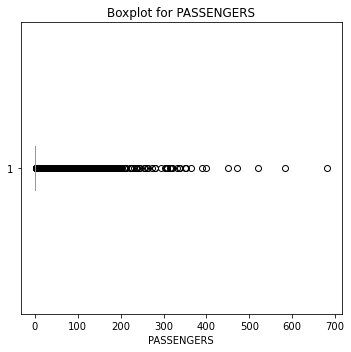

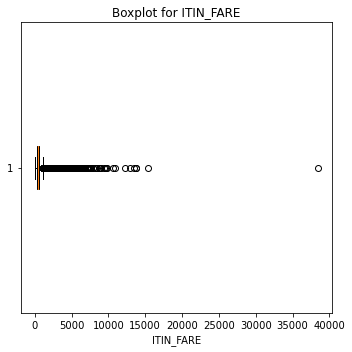

In [65]:
columns_to_numeric(tickets_cleaned, ['ITIN_FARE'])
boxplots_for_columns(tickets_cleaned, ['PASSENGERS', 'ITIN_FARE'])

In [66]:
tickets_cleaned.nlargest(10, 'PASSENGERS')

,ORIGIN,ROUNDTRIP,PASSENGERS,ITIN_FARE,DESTINATION
214316,DTW,True,681.0,11.0,MCO
372269,MDW,True,582.0,11.0,MCO
228515,EWR,True,519.0,0.0,PBI
216316,DTW,True,471.0,11.0,TPA
479604,PHX,True,451.0,11.0,LAS
370788,MDW,True,398.0,11.0,PHX
575662,SJC,True,390.0,11.0,SAN
55713,ATL,True,365.0,11.0,MIA
668689,SJC,True,352.0,11.0,LAS
266028,HNL,True,349.0,148.0,LIH


In [67]:
tickets_cleaned.nlargest(10, 'ITIN_FARE')

,ORIGIN,ROUNDTRIP,PASSENGERS,ITIN_FARE,DESTINATION
585640,SLC,True,1.0,38400.0,TWF
563853,SFO,True,1.0,15365.0,EWR
24804,PIH,True,1.0,13790.0,SLC
697585,PIH,True,1.0,13790.0,SLC
562804,SFO,True,1.0,13474.0,LAS
227514,EWR,True,1.0,12882.0,ORD
73253,BDL,True,1.0,12225.0,IAH
326183,LAX,True,1.0,10944.0,ORD
359739,MCI,True,1.0,10564.0,PHX
178120,DEN,True,1.0,9816.0,DAY


In [68]:
tickets_cleaned.nsmallest(10, 'ITIN_FARE')

,ORIGIN,ROUNDTRIP,PASSENGERS,ITIN_FARE,DESTINATION
712,ABR,True,1.0,0.0,SJU
774,ABR,True,5.0,0.0,MCO
906,ABR,True,1.0,0.0,HNL
918,ABR,True,1.0,0.0,OGG
954,ABR,True,2.0,0.0,RSW
955,ABR,True,3.0,0.0,LAS
974,ABR,True,1.0,0.0,PHX
1003,ABR,True,1.0,0.0,OGG
1011,ABR,True,1.0,0.0,OGG
1027,ABR,True,1.0,0.0,OGG


It appears the `PASSENGERS` and `ITIN_FARE` is not very clean data. <br>
- The highest `PASSENGERS` itineraries we found are certinly not right, as an Itinerary with hundreds of passengers would be expensive, and not less than `$100` like we see commonly above
- The highest `ININ_FARE` we see may be incorrect, but it's hard to tell. If these were private chartered flights, it may well be one passenger on a plane by themselves.  This could explain very high itinerary prices as private flight is expensive.
- The lowest `ININ_FARE` in the data are showing `$0` which may be accurate if something like miles, points or a gift card was used. The meatadata description does not note these situations.<br>
- The highest `PASSENGERS` seems troublesome. After some cleaning there are itineraries with hundreds of people. That may be believable if, for example, a large company is sending an entire office via a flight. But this would be costly, but in the sample we pulled many are shown costing less than $100.

**DATA CLEANING ASSUMPTION**
1) I am going to remove itinerearies where `ITIN_FARE == 0` becuase I cannot explain how this can be the case. Because this analysis is about revenue and cost, and these itinerearies do not contribute revenue. More data would be requiered on how an itinerary could be free.<br>
2) I will remove rows where `PASSENGERS >= ITIN_FARE`. This is likely to remove invalid data points.


In [69]:
tickets_cleaned = tickets_cleaned[tickets_cleaned['ITIN_FARE'] != 0]
tickets_cleaned = tickets_cleaned[tickets_cleaned['ITIN_FARE'] >= tickets_cleaned['PASSENGERS']]

In [70]:
tickets_cleaned = tickets_cleaned.reset_index(drop=True)

In [71]:
tickets_cleaned.isnull().sum()

ORIGIN         0
ROUNDTRIP      0
PASSENGERS     0
ITIN_FARE      0
DESTINATION    0
dtype: int64

Those data cleaning assumption removed our need to handle NaNs

In [72]:
tickets_cleaned['ROUTE'] = tickets_cleaned['ORIGIN'].astype(str) + '-'\
                                        + tickets_cleaned['DESTINATION'].astype(str)
tickets_cleaned = get_columns_to_category(tickets_cleaned, ['ROUTE'])

In [73]:
tickets_cleaned

,ORIGIN,ROUNDTRIP,PASSENGERS,ITIN_FARE,DESTINATION,ROUTE
0,ABI,True,1.0,736.0,DAB,ABI-DAB
1,ABI,True,1.0,570.0,COS,ABI-COS
2,ABI,True,1.0,564.0,MCO,ABI-MCO
3,ABI,True,1.0,345.0,LGA,ABI-LGA
4,ABI,True,1.0,1647.0,JAX,ABI-JAX
...,...,...,...,...,...,...
697984,YAK,True,5.0,11.0,ANC,YAK-ANC
697985,YAK,True,3.0,489.0,ANC,YAK-ANC
697986,YAK,True,3.0,493.0,ANC,YAK-ANC
697987,YAK,True,1.0,371.0,JNU,YAK-JNU


In [74]:
tickets_cleaned[tickets_cleaned['PASSENGERS'].between(1, 10)].groupby('PASSENGERS')['ITIN_FARE'].median()

PASSENGERS
1.0     449.0
2.0     354.0
3.0     324.0
4.0     302.0
5.0     297.0
6.0     285.0
7.0     286.0
8.0     273.0
9.0     269.0
10.0    261.0
Name: ITIN_FARE, dtype: float64

The per-pserson cost of the itinerary decrease with more passengers. This is probably a quantity bulk discount effect.

In [75]:
tickets_cleaned['ITIN_REVENUE'] = (tickets_cleaned['PASSENGERS'] * tickets_cleaned['ITIN_FARE'])
tickets_cleaned['ITIN_REVENUE'] = tickets_cleaned['ITIN_REVENUE'].astype('int32')
tickets_cleaned['PASSENGERS'] = tickets_cleaned['PASSENGERS'].astype('int32')
tickets_cleaned['ITIN_FARE'] = tickets_cleaned['ITIN_FARE'].astype('int32')

In [76]:
tickets_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697989 entries, 0 to 697988
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   ORIGIN        697989 non-null  object  
 1   ROUNDTRIP     697989 non-null  bool    
 2   PASSENGERS    697989 non-null  int32   
 3   ITIN_FARE     697989 non-null  int32   
 4   DESTINATION   697989 non-null  object  
 5   ROUTE         697989 non-null  category
 6   ITIN_REVENUE  697989 non-null  int32   
dtypes: bool(1), category(1), int32(3), object(2)
memory usage: 23.3+ MB


In [77]:
tickets_cleaned

,ORIGIN,ROUNDTRIP,PASSENGERS,ITIN_FARE,DESTINATION,ROUTE,ITIN_REVENUE
0,ABI,True,1,736,DAB,ABI-DAB,736
1,ABI,True,1,570,COS,ABI-COS,570
2,ABI,True,1,564,MCO,ABI-MCO,564
3,ABI,True,1,345,LGA,ABI-LGA,345
4,ABI,True,1,1647,JAX,ABI-JAX,1647
...,...,...,...,...,...,...,...
697984,YAK,True,5,11,ANC,YAK-ANC,55
697985,YAK,True,3,489,ANC,YAK-ANC,1467
697986,YAK,True,3,493,ANC,YAK-ANC,1479
697987,YAK,True,1,371,JNU,YAK-JNU,371


In [78]:
flights_airpot_code_merged

,FL_DATE,ORIGIN,DESTINATION,DEP_DELAY,ARR_DELAY,DISTANCE,OCCUPANCY_RATE,ORIGIN_TYPE,DESTINATION_TYPE,ROUTE
0,2019-03-02,RSW,CLE,-8,-6,1025,0.970000,large_airport,large_airport,RSW-CLE
1,2019-03-02,RSW,CMH,1,5,930,0.550000,large_airport,large_airport,RSW-CMH
2,2019-03-02,RSW,CMH,0,4,930,0.910000,large_airport,large_airport,RSW-CMH
3,2019-03-02,RSW,CMH,11,14,930,0.670000,large_airport,large_airport,RSW-CMH
4,2019-03-02,RSW,DAL,0,-17,1005,0.620000,large_airport,large_airport,RSW-DAL
...,...,...,...,...,...,...,...,...,...,...
1845317,2019-03-23,TUL,CLT,-9,-6,606,0.794884,large_airport,large_airport,TUL-CLT
1845318,2019-03-24,TUL,CLT,-2,-1,606,0.538399,large_airport,large_airport,TUL-CLT
1845319,2019-03-25,TUL,CLT,-8,-25,606,0.955579,large_airport,large_airport,TUL-CLT
1845320,2019-03-26,TUL,CLT,-9,-6,606,0.595344,large_airport,large_airport,TUL-CLT


Adding costs

In [79]:
# Costs provided
flights_airpot_code_merged['PER_MILE_COST'] = flights_airpot_code_merged['DISTANCE'] * 9.18 # $8 + $1.18
flights_airpot_code_merged['LANDING_COST'] = np.where(flights_airpot_code_merged['DESTINATION_TYPE'] == 'medium_airport', 5000, 10000)
flights_airpot_code_merged['DEP_DELAY_COST'] = np.where(flights_airpot_code_merged['DEP_DELAY'] > 15, (flights_airpot_code_merged['DEP_DELAY'] - 15) * 75,0)
flights_airpot_code_merged['ARR_DELAY_COST'] = np.where(flights_airpot_code_merged['ARR_DELAY'] > 15, (flights_airpot_code_merged['ARR_DELAY'] - 15) * 75,0)
flights_airpot_code_merged = flights_airpot_code_merged
# Revenue provided
flights_airpot_code_merged['OCCUPANCY'] = np.floor(flights_airpot_code_merged['OCCUPANCY_RATE'] * 200)
flights_airpot_code_merged['BAGGAGE_REVENUE'] = (flights_airpot_code_merged['OCCUPANCY'] * .5) * 35 # 50% of occupants will check bag


In [80]:
flights_airpot_code_merged

,FL_DATE,ORIGIN,DESTINATION,DEP_DELAY,ARR_DELAY,DISTANCE,OCCUPANCY_RATE,ORIGIN_TYPE,DESTINATION_TYPE,ROUTE,PER_MILE_COST,LANDING_COST,DEP_DELAY_COST,ARR_DELAY_COST,OCCUPANCY,BAGGAGE_REVENUE
0,2019-03-02,RSW,CLE,-8,-6,1025,0.970000,large_airport,large_airport,RSW-CLE,9409.50,10000,0,0,194.0,3395.0
1,2019-03-02,RSW,CMH,1,5,930,0.550000,large_airport,large_airport,RSW-CMH,8537.40,10000,0,0,110.0,1925.0
2,2019-03-02,RSW,CMH,0,4,930,0.910000,large_airport,large_airport,RSW-CMH,8537.40,10000,0,0,182.0,3185.0
3,2019-03-02,RSW,CMH,11,14,930,0.670000,large_airport,large_airport,RSW-CMH,8537.40,10000,0,0,134.0,2345.0
4,2019-03-02,RSW,DAL,0,-17,1005,0.620000,large_airport,large_airport,RSW-DAL,9225.90,10000,0,0,124.0,2170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845317,2019-03-23,TUL,CLT,-9,-6,606,0.794884,large_airport,large_airport,TUL-CLT,5563.08,10000,0,0,158.0,2765.0
1845318,2019-03-24,TUL,CLT,-2,-1,606,0.538399,large_airport,large_airport,TUL-CLT,5563.08,10000,0,0,107.0,1872.5
1845319,2019-03-25,TUL,CLT,-8,-25,606,0.955579,large_airport,large_airport,TUL-CLT,5563.08,10000,0,0,191.0,3342.5
1845320,2019-03-26,TUL,CLT,-9,-6,606,0.595344,large_airport,large_airport,TUL-CLT,5563.08,10000,0,0,119.0,2082.5


## AGGREGATING

In [81]:
flights_airpot_code_merged_agg = flights_airpot_code_merged.groupby(['ROUTE']).agg({'DEP_DELAY': 'sum',\
                                                                                'ARR_DELAY' : 'sum',\
                                                                                'DISTANCE' : 'sum',\
                                                                                'OCCUPANCY_RATE' : 'mean',\
                                                                                'ORIGIN_TYPE' : 'first',\
                                                                                'DESTINATION_TYPE' : 'first',\
                                                                                'ORIGIN' : 'first',\
                                                                                'DESTINATION': 'first',\
                                                                                'PER_MILE_COST' : 'sum',\
                                                                                'LANDING_COST' : 'sum',\
                                                                                'DEP_DELAY_COST' : 'sum',\
                                                                                'ARR_DELAY_COST' : 'sum',\
                                                                                'OCCUPANCY' : 'sum',\
                                                                                'BAGGAGE_REVENUE' : 'sum',\
                                                                                'FL_DATE' : 'count'})\
                                                                                .reset_index()

In [82]:
flights_airpot_code_merged_agg.rename(columns={
    'DEP_DELAY': 'DEP_DELAY_sum',
    'ARR_DELAY': 'ARR_DELAY_sum',
    'DISTANCE': 'DISTANCE_sum',
    'OCCUPANCY_RATE': 'OCCUPANCY_RATE_mean',
    'PER_MILE_COST' : 'PER_MILE_COST_sum',
    'LANDING_COST' : 'LANDING_COST_sum',
    'DEP_DELAY_COST' : 'DEP_DELAY_COST_sum',
    'ARR_DELAY_COST' : 'ARR_DELAY_COST_sum',
    'OCCUPANCY' : 'OCCUPANCY_sum',
    'BAGGAGE_REVENUE' : 'BAGGAGE_REVENUE_sum',
    'FL_DATE' : 'FLIGHT_COUNT'}, inplace=True)

In [83]:
flights_airpot_code_merged_agg

,ROUTE,DEP_DELAY_sum,ARR_DELAY_sum,DISTANCE_sum,OCCUPANCY_RATE_mean,ORIGIN_TYPE,DESTINATION_TYPE,ORIGIN,DESTINATION,PER_MILE_COST_sum,LANDING_COST_sum,DEP_DELAY_COST_sum,ARR_DELAY_COST_sum,OCCUPANCY_sum,BAGGAGE_REVENUE_sum,FLIGHT_COUNT
0,ABE-ATL,1298,1185,150164,0.641567,medium_airport,large_airport,ABE,ATL,1378505.52,2170000,107100,158175,27835.0,487112.5,217
1,ABE-CLT,957,1068,120731,0.665976,medium_airport,large_airport,ABE,CLT,1108310.58,2510000,122100,134175,33422.0,584885.0,251
2,ABE-DTW,3961,2651,105400,0.639073,medium_airport,large_airport,ABE,DTW,967572.00,2480000,298125,295950,31690.0,554575.0,248
3,ABE-FLL,272,217,20820,0.580000,medium_airport,large_airport,ABE,FLL,191127.60,200000,17100,19125,2320.0,40600.0,20
4,ABE-ORD,3455,2387,103986,0.671195,medium_airport,large_airport,ABE,ORD,954591.48,1590000,274425,268800,21336.0,373380.0,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5726,YAK-CDV,-313,-328,17679,0.620723,medium_airport,medium_airport,YAK,CDV,162293.22,415000,54075,31200,10297.0,180197.5,83
5727,YAK-JNU,-1174,-1222,17424,0.678636,medium_airport,medium_airport,YAK,JNU,159952.32,440000,42750,36150,11944.0,209020.0,88
5728,YKM-SEA,3545,3506,31415,0.660393,medium_airport,large_airport,YKM,SEA,288389.70,3050000,213375,224625,40271.0,704742.5,305
5729,YUM-DFW,448,433,28616,0.637143,medium_airport,large_airport,YUM,DFW,262694.88,280000,36225,40650,3567.0,62422.5,28


For revenue - its the sum of round trip tickets for that route
so sum of LAX to NYC roud trip for them to fly there and back
But flights are one way. Like LAX to NYC with their own revenue and costs
How to get ticket data to line up


Maybe itll be to sum LAX to NYC round trip revenue with NYC to LAX revenue

flying to and from the same airport, your really providing a round trip route for ppl living in both NYC and LAX

In [84]:
tickets_cleaned

,ORIGIN,ROUNDTRIP,PASSENGERS,ITIN_FARE,DESTINATION,ROUTE,ITIN_REVENUE
0,ABI,True,1,736,DAB,ABI-DAB,736
1,ABI,True,1,570,COS,ABI-COS,570
2,ABI,True,1,564,MCO,ABI-MCO,564
3,ABI,True,1,345,LGA,ABI-LGA,345
4,ABI,True,1,1647,JAX,ABI-JAX,1647
...,...,...,...,...,...,...,...
697984,YAK,True,5,11,ANC,YAK-ANC,55
697985,YAK,True,3,489,ANC,YAK-ANC,1467
697986,YAK,True,3,493,ANC,YAK-ANC,1479
697987,YAK,True,1,371,JNU,YAK-JNU,371


In [85]:
tickets_cleaned_agg = tickets_cleaned.groupby(['ROUTE']).agg({'PASSENGERS' : 'sum',\
                                                            'ITIN_FARE' : 'sum',\
                                                            'ITIN_REVENUE' : 'sum'})\
                                                            .reset_index()

In [86]:
tickets_cleaned_agg.rename(columns={
    'PASSENGERS' : 'PASSENGERS_sum',
    'ITIN_FARE' : 'ITIN_FARE_sum',
    'ITIN_REVENUE' : 'ITIN_REVENUE_sum'}, inplace=True)

In [87]:
tickets_cleaned_agg.nlargest(10, 'ITIN_REVENUE_sum')


,ROUTE,PASSENGERS_sum,ITIN_FARE_sum,ITIN_REVENUE_sum
19935,JFK-LAX,3218,843449,2160410
21004,LAX-JFK,2182,679056,1478626
19997,JFK-SFO,1828,778791,1312876
26281,MSP-RSW,2903,301663,1072419
13061,EWR-SFO,1408,696785,1054817
12979,EWR-LAX,1746,474234,1024264
12995,EWR-MCO,3194,257789,1018665
26260,MSP-PHX,2874,306782,1010410
34848,SFO-EWR,1320,504206,984966
19934,JFK-LAS,1673,448002,967070


In [88]:
def merge_dfs_by_route(df1, df2):
    merged_df = pd.merge(df1, df2, on='ROUTE', how='inner')

    return merged_df

In [89]:
df_final = merge_dfs_by_route(flights_airpot_code_merged_agg, tickets_cleaned_agg)

In [90]:
def create_standardized_route_col(df):
    df['ROUTE'] = df['ROUTE'].str.strip()
    split_routes = df['ROUTE'].str.split('-', expand=True)
    sorted_routes = pd.DataFrame(np.sort(split_routes.values, axis=1), columns=['airport1', 'airport2'])
    df['STANDARDIZED_ROUTE'] = sorted_routes['airport1'] + '-' + sorted_routes['airport2']
    return df

In [91]:
df_final = create_standardized_route_col(df_final)

In [92]:
df_final

,ROUTE,DEP_DELAY_sum,ARR_DELAY_sum,DISTANCE_sum,OCCUPANCY_RATE_mean,ORIGIN_TYPE,DESTINATION_TYPE,ORIGIN,DESTINATION,PER_MILE_COST_sum,LANDING_COST_sum,DEP_DELAY_COST_sum,ARR_DELAY_COST_sum,OCCUPANCY_sum,BAGGAGE_REVENUE_sum,FLIGHT_COUNT,PASSENGERS_sum,ITIN_FARE_sum,ITIN_REVENUE_sum,STANDARDIZED_ROUTE
0,ABE-ATL,1298,1185,150164,0.641567,medium_airport,large_airport,ABE,ATL,1378505.52,2170000,107100,158175,27835.0,487112.5,217,57,26262,28066,ABE-ATL
1,ABE-CLT,957,1068,120731,0.665976,medium_airport,large_airport,ABE,CLT,1108310.58,2510000,122100,134175,33422.0,584885.0,251,29,13369,14987,ABE-CLT
2,ABE-DTW,3961,2651,105400,0.639073,medium_airport,large_airport,ABE,DTW,967572.00,2480000,298125,295950,31690.0,554575.0,248,42,3279,14477,ABE-DTW
3,ABE-FLL,272,217,20820,0.580000,medium_airport,large_airport,ABE,FLL,191127.60,200000,17100,19125,2320.0,40600.0,20,90,14286,18947,ABE-FLL
4,ABE-ORD,3455,2387,103986,0.671195,medium_airport,large_airport,ABE,ORD,954591.48,1590000,274425,268800,21336.0,373380.0,159,21,9887,12403,ABE-ORD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5616,YAK-CDV,-313,-328,17679,0.620723,medium_airport,medium_airport,YAK,CDV,162293.22,415000,54075,31200,10297.0,180197.5,83,2,22,22,CDV-YAK
5617,YAK-JNU,-1174,-1222,17424,0.678636,medium_airport,medium_airport,YAK,JNU,159952.32,440000,42750,36150,11944.0,209020.0,88,30,7396,7988,JNU-YAK
5618,YKM-SEA,3545,3506,31415,0.660393,medium_airport,large_airport,YKM,SEA,288389.70,3050000,213375,224625,40271.0,704742.5,305,43,5097,11000,SEA-YKM
5619,YUM-DFW,448,433,28616,0.637143,medium_airport,large_airport,YUM,DFW,262694.88,280000,36225,40650,3567.0,62422.5,28,4,1837,1837,DFW-YUM


Looking at the table above, we have a ticket data issue. There are many instances where there are more flights along a route than there are Passengers that rode on that route. Look below.

In [93]:
flights[(flights['ORIGIN'] == 'LAX')\
        & (flights['DESTINATION'] == 'JFK')]\
        ['FL_DATE'].count()

3190

In [94]:
tickets[(tickets['ORIGIN'] == 'LAX')\
        & (tickets['DESTINATION'] == 'JFK')\
        & (tickets['ROUNDTRIP'] == 1)]\
        ['PASSENGERS'].sum()

2278.0

The above is pulling data from `flights` and `tickets` dfs where only the duclicated rows where removed, so minimal cleaning. There a total of 3,190 flights from `LAX -> JFC`. However, in the tickets data, there are a total of 2,278 ticketed people for that same flight route.<br>
That is clearly a data issue, with the ticketing data provided does not match the flight data provided.<br>
**Work Around Used**<br>
According to the instructions, each flight can hold up to 200 people. And we know the occupancy rate for each flight. <br>
The workaround for this data issue I'll use is to add anew column `INFERRED_PASSENGERS = (FLIGHT_COUNT * 200) * OCCUPANCY_RATE_mean`<br>
I will add another column `MEDIAN_ROUTE_ITIN_FARE` which will be the median of the `ITIN_FARE` for that particular `ROUTE` since we saw in the previous boxplots `ITIN_FARE has skew`<br>
THis will allow us to calculate a new column `INFERRED_ITIN_REVENUE = MEDIAN_ROUTE_ITIN_FARE * INFERRED_PASSENGERS`


In [95]:
df_final['INFERRED_PASSENGERS'] = (df_final['FLIGHT_COUNT'] * 200) * df_final['OCCUPANCY_RATE_mean']

In [96]:
df_final

,ROUTE,DEP_DELAY_sum,ARR_DELAY_sum,DISTANCE_sum,OCCUPANCY_RATE_mean,ORIGIN_TYPE,DESTINATION_TYPE,ORIGIN,DESTINATION,PER_MILE_COST_sum,...,DEP_DELAY_COST_sum,ARR_DELAY_COST_sum,OCCUPANCY_sum,BAGGAGE_REVENUE_sum,FLIGHT_COUNT,PASSENGERS_sum,ITIN_FARE_sum,ITIN_REVENUE_sum,STANDARDIZED_ROUTE,INFERRED_PASSENGERS
0,ABE-ATL,1298,1185,150164,0.641567,medium_airport,large_airport,ABE,ATL,1378505.52,...,107100,158175,27835.0,487112.5,217,57,26262,28066,ABE-ATL,27844.0
1,ABE-CLT,957,1068,120731,0.665976,medium_airport,large_airport,ABE,CLT,1108310.58,...,122100,134175,33422.0,584885.0,251,29,13369,14987,ABE-CLT,33432.0
2,ABE-DTW,3961,2651,105400,0.639073,medium_airport,large_airport,ABE,DTW,967572.00,...,298125,295950,31690.0,554575.0,248,42,3279,14477,ABE-DTW,31698.0
3,ABE-FLL,272,217,20820,0.580000,medium_airport,large_airport,ABE,FLL,191127.60,...,17100,19125,2320.0,40600.0,20,90,14286,18947,ABE-FLL,2320.0
4,ABE-ORD,3455,2387,103986,0.671195,medium_airport,large_airport,ABE,ORD,954591.48,...,274425,268800,21336.0,373380.0,159,21,9887,12403,ABE-ORD,21344.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5616,YAK-CDV,-313,-328,17679,0.620723,medium_airport,medium_airport,YAK,CDV,162293.22,...,54075,31200,10297.0,180197.5,83,2,22,22,CDV-YAK,10304.0
5617,YAK-JNU,-1174,-1222,17424,0.678636,medium_airport,medium_airport,YAK,JNU,159952.32,...,42750,36150,11944.0,209020.0,88,30,7396,7988,JNU-YAK,11944.0
5618,YKM-SEA,3545,3506,31415,0.660393,medium_airport,large_airport,YKM,SEA,288389.70,...,213375,224625,40271.0,704742.5,305,43,5097,11000,SEA-YKM,40284.0
5619,YUM-DFW,448,433,28616,0.637143,medium_airport,large_airport,YUM,DFW,262694.88,...,36225,40650,3567.0,62422.5,28,4,1837,1837,DFW-YUM,3568.0


In [97]:
tickets_median_route_ITIN_FARE_agg = tickets_cleaned.groupby('ROUTE')['ITIN_FARE'].agg('median')\
                                                                                .reset_index()\
                                                                                .rename(columns={'ITIN_FARE': 'MEDIAN_ROUTE_ITIN_FARE'})


In [98]:
tickets_median_route_ITIN_FARE_agg

,ROUTE,MEDIAN_ROUTE_ITIN_FARE
0,ABE-ABQ,534.0
1,ABE-AGS,299.0
2,ABE-AMA,654.0
3,ABE-ASE,742.0
4,ABE-ATL,494.0
...,...,...
40059,YUM-SMF,276.5
40060,YUM-SRQ,696.0
40061,YUM-TOL,335.0
40062,YUM-TPA,489.0


In [99]:
df_final = merge_dfs_by_route(df_final, tickets_median_route_ITIN_FARE_agg)

In [100]:
df_final

,ROUTE,DEP_DELAY_sum,ARR_DELAY_sum,DISTANCE_sum,OCCUPANCY_RATE_mean,ORIGIN_TYPE,DESTINATION_TYPE,ORIGIN,DESTINATION,PER_MILE_COST_sum,...,ARR_DELAY_COST_sum,OCCUPANCY_sum,BAGGAGE_REVENUE_sum,FLIGHT_COUNT,PASSENGERS_sum,ITIN_FARE_sum,ITIN_REVENUE_sum,STANDARDIZED_ROUTE,INFERRED_PASSENGERS,MEDIAN_ROUTE_ITIN_FARE
0,ABE-ATL,1298,1185,150164,0.641567,medium_airport,large_airport,ABE,ATL,1378505.52,...,158175,27835.0,487112.5,217,57,26262,28066,ABE-ATL,27844.0,494.0
1,ABE-CLT,957,1068,120731,0.665976,medium_airport,large_airport,ABE,CLT,1108310.58,...,134175,33422.0,584885.0,251,29,13369,14987,ABE-CLT,33432.0,496.0
2,ABE-DTW,3961,2651,105400,0.639073,medium_airport,large_airport,ABE,DTW,967572.00,...,295950,31690.0,554575.0,248,42,3279,14477,ABE-DTW,31698.0,531.0
3,ABE-FLL,272,217,20820,0.580000,medium_airport,large_airport,ABE,FLL,191127.60,...,19125,2320.0,40600.0,20,90,14286,18947,ABE-FLL,2320.0,192.0
4,ABE-ORD,3455,2387,103986,0.671195,medium_airport,large_airport,ABE,ORD,954591.48,...,268800,21336.0,373380.0,159,21,9887,12403,ABE-ORD,21344.0,544.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5616,YAK-CDV,-313,-328,17679,0.620723,medium_airport,medium_airport,YAK,CDV,162293.22,...,31200,10297.0,180197.5,83,2,22,22,CDV-YAK,10304.0,11.0
5617,YAK-JNU,-1174,-1222,17424,0.678636,medium_airport,medium_airport,YAK,JNU,159952.32,...,36150,11944.0,209020.0,88,30,7396,7988,JNU-YAK,11944.0,329.5
5618,YKM-SEA,3545,3506,31415,0.660393,medium_airport,large_airport,YKM,SEA,288389.70,...,224625,40271.0,704742.5,305,43,5097,11000,SEA-YKM,40284.0,234.0
5619,YUM-DFW,448,433,28616,0.637143,medium_airport,large_airport,YUM,DFW,262694.88,...,40650,3567.0,62422.5,28,4,1837,1837,DFW-YUM,3568.0,464.0


In [101]:
df_final['INFERRED_ITIN_REVENUE'] = df_final['INFERRED_PASSENGERS'] * df_final['MEDIAN_ROUTE_ITIN_FARE']

In [102]:
def get_reverse_route_and_their_counts(df):
    df['REVERSE_ROUTE'] = df['ROUTE'].str.split('-').str[::-1].str.join('-')
    df['REVERSE_ROUTE_COUNT'] = df['REVERSE_ROUTE'].map(df.set_index('ROUTE')['FLIGHT_COUNT'])
    df['REVERSE_ROUTE_COUNT'] = df['REVERSE_ROUTE_COUNT'].fillna(0) # if no mattching return flight it will return NaN
    df['REVERSE_ROUTE_COUNT'] = df['REVERSE_ROUTE_COUNT'].astype('int32')
    return df

In [103]:
def get_true_roundtrip_counts_per_route(df):
    df['TRUE_ROUNDTRIPS'] = np.minimum(df['FLIGHT_COUNT'], df['REVERSE_ROUTE_COUNT'])
    return df

Write review of what we did to get to final_df

## Task 1
***The 10 busiest round trip routes in terms of number of round trip flights in the quarter. Exclude canceled flights when performing the calculation.***<br><br>
We are asked for the # of round trip flights, with 'round trip' defined in the instructions as a flight pairing each `(origin → destination)` with its reverse `(destination → origin)` (*Example being JFK to ORD and ORD to JFK as one round trip*).<br><br>
**ASSUMPTIONS**
- We assume that round-trip routes are defined by the airports visited, regardless of the starting point or travel timing. For example, a trip from NYC to OKC and back to NYC is considered equivalent to a trip from OKC to NYC and back to OKC.<br><br>
- Althought it is common for a round trip ticket to be with the same airline, the task did not mention to call that out. Therefore, the distinct operating airlines were not included.

In [104]:
flight_route_counts = df_final.groupby(['ROUTE']).agg({'FLIGHT_COUNT' : 'sum',\
                                                      'STANDARDIZED_ROUTE' : 'first'})\
                                                        .reset_index()\
                                                        .sort_values(by='FLIGHT_COUNT', ascending=False)




In [105]:
flight_route_counts

,ROUTE,FLIGHT_COUNT,STANDARDIZED_ROUTE
5013,SFO-LAX,4176,LAX-SFO
2874,LAX-SFO,4164,LAX-SFO
3893,ORD-LGA,3580,LGA-ORD
2976,LGA-ORD,3576,LGA-ORD
2837,LAX-LAS,3257,LAS-LAX
...,...,...,...
3865,ORD-FAT,1,FAT-ORD
2447,IAH-STT,1,IAH-STT
3328,MIA-ABQ,1,ABQ-MIA
1205,DCA-BTR,1,BTR-DCA


In [106]:
def get_reverse_route_and_their_counts(df):
    df['REVERSE_ROUTE'] = df['ROUTE'].str.split('-').str[::-1].str.join('-')
    df['REVERSE_ROUTE_COUNT'] = df['REVERSE_ROUTE'].map(df.set_index('ROUTE')['FLIGHT_COUNT'])
    df['REVERSE_ROUTE_COUNT'] = df['REVERSE_ROUTE_COUNT'].fillna(0) # if no mattching return flight it will return NaN
    df['REVERSE_ROUTE_COUNT'] = df['REVERSE_ROUTE_COUNT'].astype('int32')
    return df

In [107]:
flight_route_counts = get_reverse_route_and_their_counts(flight_route_counts).reset_index(drop=True)

In [108]:
flight_route_counts

,ROUTE,FLIGHT_COUNT,STANDARDIZED_ROUTE,REVERSE_ROUTE,REVERSE_ROUTE_COUNT
0,SFO-LAX,4176,LAX-SFO,LAX-SFO,4164
1,LAX-SFO,4164,LAX-SFO,SFO-LAX,4176
2,ORD-LGA,3580,LGA-ORD,LGA-ORD,3576
3,LGA-ORD,3576,LGA-ORD,ORD-LGA,3580
4,LAX-LAS,3257,LAS-LAX,LAS-LAX,3254
...,...,...,...,...,...
5616,ORD-FAT,1,FAT-ORD,FAT-ORD,1
5617,IAH-STT,1,IAH-STT,STT-IAH,0
5618,MIA-ABQ,1,ABQ-MIA,ABQ-MIA,0
5619,DCA-BTR,1,BTR-DCA,BTR-DCA,1


In [109]:
def get_true_roundtrip_counts_per_route(df):
    df['TRUE_ROUNDTRIPS'] = np.minimum(df['FLIGHT_COUNT'], df['REVERSE_ROUTE_COUNT'])
    return df

In [110]:
flight_route_counts = get_true_roundtrip_counts_per_route(flight_route_counts)

In [111]:
flight_route_counts.head(10)

,ROUTE,FLIGHT_COUNT,STANDARDIZED_ROUTE,REVERSE_ROUTE,REVERSE_ROUTE_COUNT,TRUE_ROUNDTRIPS
0,SFO-LAX,4176,LAX-SFO,LAX-SFO,4164,4164
1,LAX-SFO,4164,LAX-SFO,SFO-LAX,4176,4164
2,ORD-LGA,3580,LGA-ORD,LGA-ORD,3576,3576
3,LGA-ORD,3576,LGA-ORD,ORD-LGA,3580,3576
4,LAX-LAS,3257,LAS-LAX,LAS-LAX,3254,3254
5,LAS-LAX,3254,LAS-LAX,LAX-LAS,3257,3254
6,LAX-JFK,3162,JFK-LAX,JFK-LAX,3158,3158
7,JFK-LAX,3158,JFK-LAX,LAX-JFK,3162,3158
8,LAX-SEA,2502,LAX-SEA,SEA-LAX,2497,2497
9,SEA-LAX,2497,LAX-SEA,LAX-SEA,2502,2497


In [112]:
def get_new_df_of_roundtrip_counts(df, roundtrip_standardized, trip_count):
    
    new_df = df[[roundtrip_standardized, trip_count]]
    new_df = new_df.drop_duplicates(keep = 'first')
    new_df = new_df.sort_values(by=trip_count, ascending = False)
    return new_df

In [113]:
df_roundtrip_counts = get_new_df_of_roundtrip_counts(flight_route_counts, 'STANDARDIZED_ROUTE', 'TRUE_ROUNDTRIPS')

In [114]:
df_roundtrip_counts = df_roundtrip_counts.head(10)

## Task 1 

In [115]:
def bar_chart(x, y, title, xlabel, ylabel, color):
    # Create bar chart

    # Colors
    cmap = cm.get_cmap(color)  # or 'plasma', 'tab10', 'Set1', etc.
    colors = [cmap(i / len(x)) for i in range(len(x))]

    plt.figure(figsize=(12, 8))
    plt.bar(x, y, color=colors)

    # Add title and labels
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=18)
    plt.ylabel(ylabel, fontsize=18)
    plt.xticks(rotation=45, ha='right', fontsize=18)  
    plt.yticks(fontsize=15)
    plt.tight_layout()  # Ensure labels fit within the figure

    
    # Show plot
    plt.show()

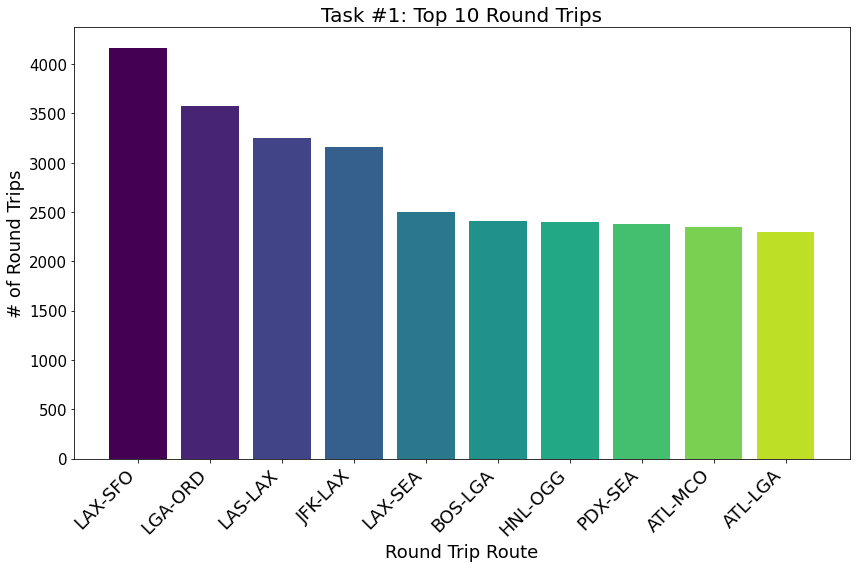

In [116]:
bar_chart(df_roundtrip_counts['STANDARDIZED_ROUTE'],\
          df_roundtrip_counts['TRUE_ROUNDTRIPS'],\
          'Task #1: Top 10 Round Trips',\
          'Round Trip Route',\
          '# of Round Trips',\
          'viridis')

## Task 2
***The 10 most profitable round trip routes (without considering the upfront airplane cost) in the quarter. Along with the profit, show total revenue, total cost, summary values of other key components and total round trip flights in the quarter for the top 10 most profitable routes. Exclude canceled flights from these calculations.***<br><br>

**ASSUMPTIONS**


Get ticket income
Sum itinerary fare on trip itereraries
Sum costs on trips
Sum all those on round trips



In [117]:
df_final

,ROUTE,DEP_DELAY_sum,ARR_DELAY_sum,DISTANCE_sum,OCCUPANCY_RATE_mean,ORIGIN_TYPE,DESTINATION_TYPE,ORIGIN,DESTINATION,PER_MILE_COST_sum,...,OCCUPANCY_sum,BAGGAGE_REVENUE_sum,FLIGHT_COUNT,PASSENGERS_sum,ITIN_FARE_sum,ITIN_REVENUE_sum,STANDARDIZED_ROUTE,INFERRED_PASSENGERS,MEDIAN_ROUTE_ITIN_FARE,INFERRED_ITIN_REVENUE
0,ABE-ATL,1298,1185,150164,0.641567,medium_airport,large_airport,ABE,ATL,1378505.52,...,27835.0,487112.5,217,57,26262,28066,ABE-ATL,27844.0,494.0,13754936.0
1,ABE-CLT,957,1068,120731,0.665976,medium_airport,large_airport,ABE,CLT,1108310.58,...,33422.0,584885.0,251,29,13369,14987,ABE-CLT,33432.0,496.0,16582272.0
2,ABE-DTW,3961,2651,105400,0.639073,medium_airport,large_airport,ABE,DTW,967572.00,...,31690.0,554575.0,248,42,3279,14477,ABE-DTW,31698.0,531.0,16831638.0
3,ABE-FLL,272,217,20820,0.580000,medium_airport,large_airport,ABE,FLL,191127.60,...,2320.0,40600.0,20,90,14286,18947,ABE-FLL,2320.0,192.0,445440.0
4,ABE-ORD,3455,2387,103986,0.671195,medium_airport,large_airport,ABE,ORD,954591.48,...,21336.0,373380.0,159,21,9887,12403,ABE-ORD,21344.0,544.0,11611136.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5616,YAK-CDV,-313,-328,17679,0.620723,medium_airport,medium_airport,YAK,CDV,162293.22,...,10297.0,180197.5,83,2,22,22,CDV-YAK,10304.0,11.0,113344.0
5617,YAK-JNU,-1174,-1222,17424,0.678636,medium_airport,medium_airport,YAK,JNU,159952.32,...,11944.0,209020.0,88,30,7396,7988,JNU-YAK,11944.0,329.5,3935548.0
5618,YKM-SEA,3545,3506,31415,0.660393,medium_airport,large_airport,YKM,SEA,288389.70,...,40271.0,704742.5,305,43,5097,11000,SEA-YKM,40284.0,234.0,9426456.0
5619,YUM-DFW,448,433,28616,0.637143,medium_airport,large_airport,YUM,DFW,262694.88,...,3567.0,62422.5,28,4,1837,1837,DFW-YUM,3568.0,464.0,1655552.0


In [118]:
route_revenue_and_costs = df_final.groupby(['STANDARDIZED_ROUTE']).agg({'PER_MILE_COST_sum' : 'sum',\
                                                                        'LANDING_COST_sum' : 'sum',\
                                                                        'DEP_DELAY_COST_sum' : 'sum',\
                                                                        'ARR_DELAY_COST_sum' : 'sum',\
                                                                        'BAGGAGE_REVENUE_sum' : 'sum',\
                                                                        'ITIN_REVENUE_sum' : 'sum',\
                                                                        'PER_MILE_COST_sum' : 'sum',\
                                                                        'PASSENGERS_sum' : 'sum',\
                                                                        'OCCUPANCY_RATE_mean' : 'first',\
                                                                        'INFERRED_PASSENGERS' : 'sum',\
                                                                        'INFERRED_ITIN_REVENUE' : 'sum',\
                                                                        'FLIGHT_COUNT' : 'min',})\
                                                                        .sort_values(by='FLIGHT_COUNT', ascending=False)\
                                                                        .reset_index()




In [119]:
# Adding total revenue, total cost, and profit
route_revenue_and_costs['TOTAL_REVENUE_M'] = ((route_revenue_and_costs['INFERRED_ITIN_REVENUE']\
                                            + route_revenue_and_costs['BAGGAGE_REVENUE_sum']) / 1000000)

route_revenue_and_costs['TOTAL_COST_M'] = ((route_revenue_and_costs['PER_MILE_COST_sum']\
                                            + route_revenue_and_costs['LANDING_COST_sum']\
                                            + route_revenue_and_costs['DEP_DELAY_COST_sum']\
                                            + route_revenue_and_costs['ARR_DELAY_COST_sum']) / 1000000)

route_revenue_and_costs['TOTAL_PROFIT_M'] = (route_revenue_and_costs['TOTAL_REVENUE_M']\
                                            - route_revenue_and_costs['TOTAL_COST_M'])


In [120]:
top_10_most_profitable = route_revenue_and_costs.sort_values(by='TOTAL_PROFIT_M', ascending=False).head(10)

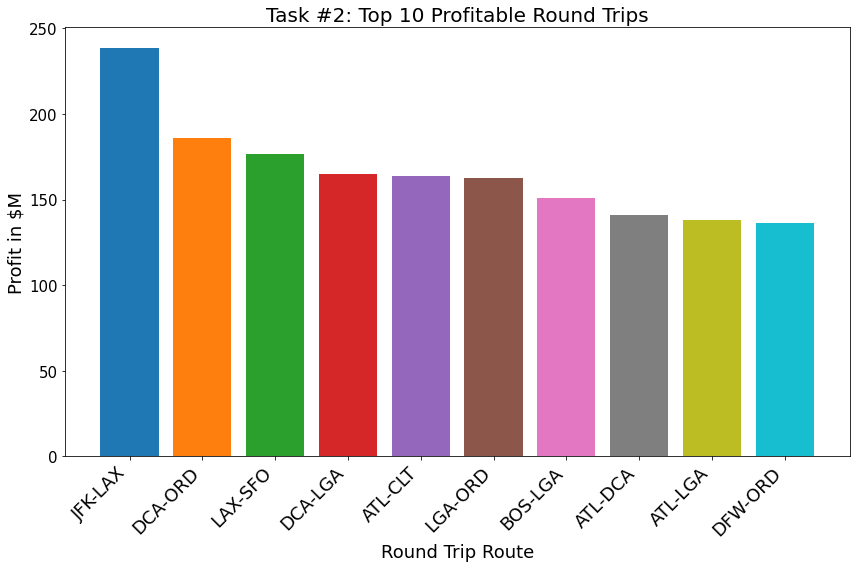

In [121]:
bar_chart(top_10_most_profitable['STANDARDIZED_ROUTE'],\
          top_10_most_profitable['TOTAL_PROFIT_M'],\
          'Task #2: Top 10 Profitable Round Trips',\
          'Round Trip Route',\
          'Profit in $M',\
          'tab10')

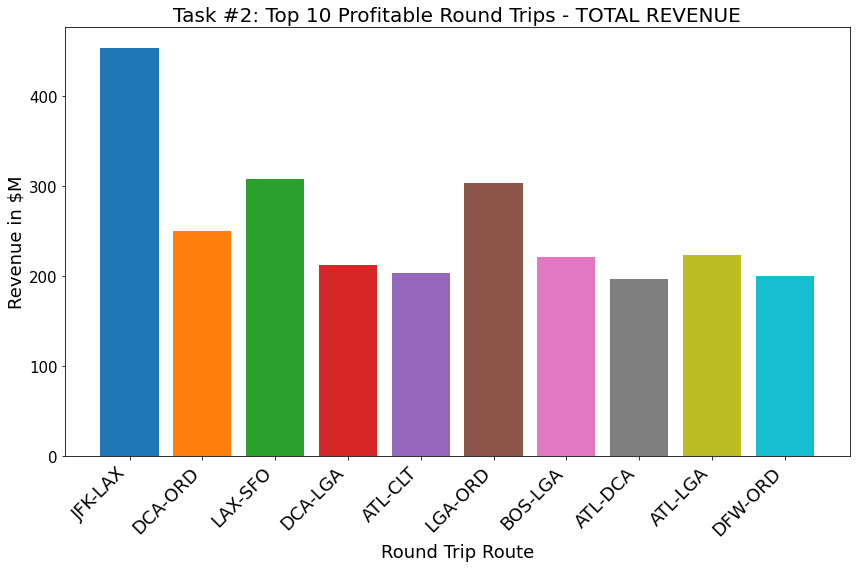

In [122]:
bar_chart(top_10_most_profitable['STANDARDIZED_ROUTE'],\
          top_10_most_profitable['TOTAL_REVENUE_M'],\
          'Task #2: Top 10 Profitable Round Trips - TOTAL REVENUE',\
          'Round Trip Route',\
          'Revenue in $M',\
          'tab10')

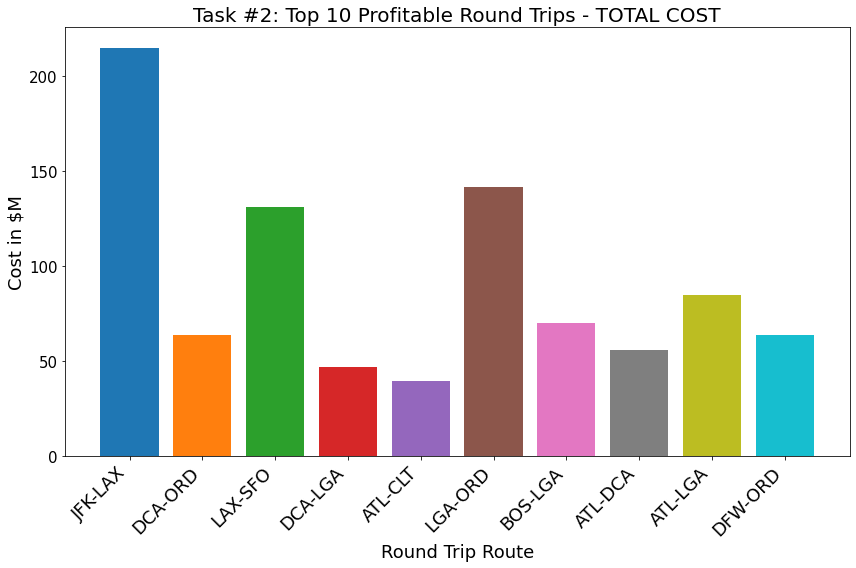

In [123]:
bar_chart(top_10_most_profitable['STANDARDIZED_ROUTE'],\
          top_10_most_profitable['TOTAL_COST_M'],\
          'Task #2: Top 10 Profitable Round Trips - TOTAL COST',\
          'Round Trip Route',\
          'Cost in $M',\
          'tab10')

In [124]:
top_10_most_profitable

,STANDARDIZED_ROUTE,PER_MILE_COST_sum,LANDING_COST_sum,DEP_DELAY_COST_sum,ARR_DELAY_COST_sum,BAGGAGE_REVENUE_sum,ITIN_REVENUE_sum,PASSENGERS_sum,OCCUPANCY_RATE_mean,INFERRED_PASSENGERS,INFERRED_ITIN_REVENUE,FLIGHT_COUNT,TOTAL_REVENUE_M,TOTAL_COST_M,TOTAL_PROFIT_M
3,JFK-LAX,1.435936e+08,63200000,4053225,4102575,14376827.5,3639036,5400,0.646843,821694.0,439263957.0,3158,453.640784,214.949360,238.691424
22,DCA-ORD,2.075910e+07,36950000,3050700,3323700,8377390.0,636422,1348,0.646757,478814.0,241564138.0,1847,249.941528,64.083501,185.858027
0,LAX-SFO,2.580112e+07,83400000,10515900,11548350,18940740.0,1007350,4258,0.645029,1082554.0,289132052.0,4164,308.072792,131.265374,176.807418
34,DCA-LGA,6.598823e+06,33590000,3047700,3883350,7670617.5,303991,806,0.654091,438424.0,204634827.0,1677,212.305444,47.119873,165.185572
42,ATL-CLT,6.381716e+06,30760000,1382625,1326750,6984110.0,216535,436,0.644169,399188.0,196843388.0,1535,203.827498,39.851091,163.976407
1,LGA-ORD,4.815229e+07,71560000,10339875,11598075,16254262.5,1352337,4622,0.648716,929026.0,287767181.0,3576,304.021443,141.650245,162.371199
5,BOS-LGA,8.141558e+06,48200000,6841725,7157700,10977767.5,505382,1605,0.652990,627434.0,210177034.0,2405,221.154801,70.340983,150.813818
26,ATL-DCA,1.751485e+07,34880000,1784550,1944000,7938665.0,853879,2138,0.650808,453738.0,189225252.0,1742,197.163917,56.123402,141.040515
9,ATL-LGA,3.213577e+07,45940000,3317025,3502800,10466767.5,1254752,3412,0.655871,598240.0,212649912.0,2293,223.116680,84.895590,138.221089
35,DFW-ORD,2.407488e+07,32740000,3579525,3726825,7544477.5,975174,2394,0.654160,431208.0,192650392.0,1630,200.194870,64.121230,136.073639


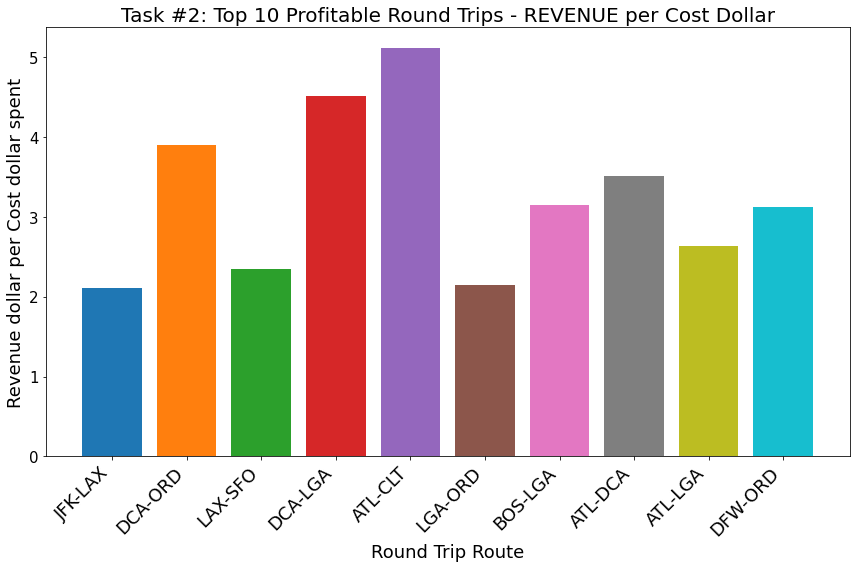

In [125]:
bar_chart(top_10_most_profitable['STANDARDIZED_ROUTE'],\
          (top_10_most_profitable['TOTAL_REVENUE_M'] / top_10_most_profitable['TOTAL_COST_M']),\
          'Task #2: Top 10 Profitable Round Trips - REVENUE per Cost Dollar',\
          'Round Trip Route',\
          'Revenue dollar per Cost dollar spent',\
          'tab10')

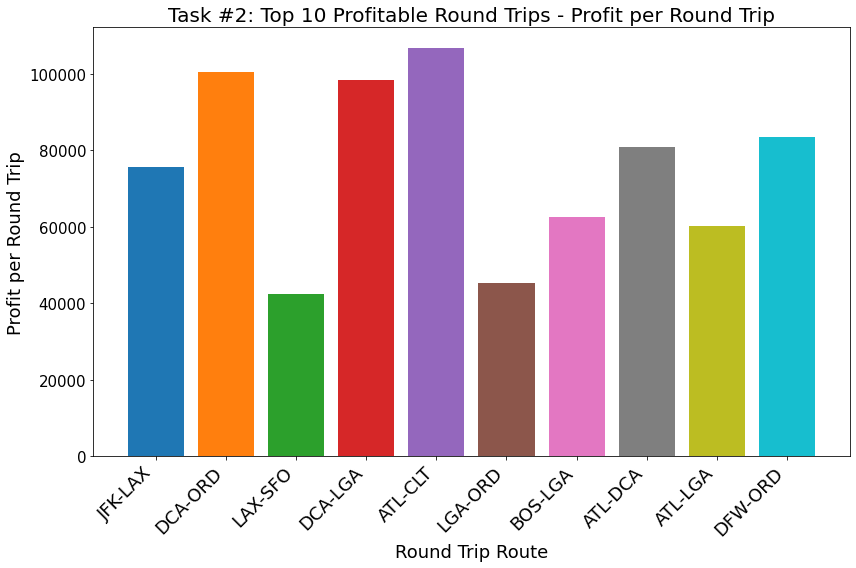

In [126]:
bar_chart(top_10_most_profitable['STANDARDIZED_ROUTE'],\
          ((top_10_most_profitable['TOTAL_PROFIT_M'] / top_10_most_profitable['FLIGHT_COUNT'])*1000000),\
          'Task #2: Top 10 Profitable Round Trips - Profit per Round Trip',\
          'Round Trip Route',\
          'Profit per Round Trip',\
          'tab10')

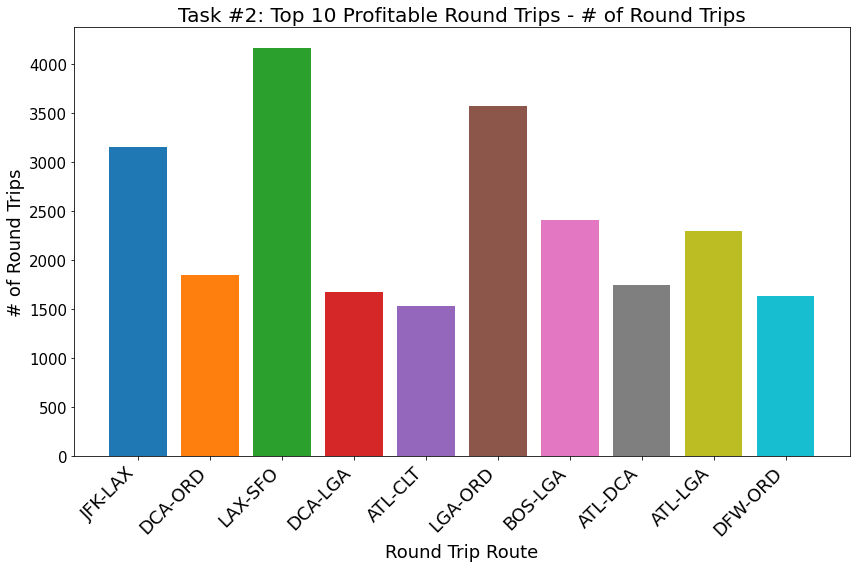

In [127]:
bar_chart(top_10_most_profitable['STANDARDIZED_ROUTE'],\
          top_10_most_profitable['FLIGHT_COUNT'],\
          'Task #2: Top 10 Profitable Round Trips - # of Round Trips',\
          'Round Trip Route',\
          '# of Round Trips',\
          'tab10')

## Task 3 <br>
**The 5 round trip routes that you recommend to invest in based on any factors that you
choose.**<br>
Since the problem statement is helping a airline company enter into the US market wisely, all the provided data has to be from current airlines operating in the US market. This was also indicated by the `flights` data already having the airline category for its observations.<br>
As a airline entering the market, there are two main consideration:
1) Profitablility<br>
2) Maintaining positive and punctual brand image drawing customers and market share<br>

We will create a metric that will assess these goals.
- First, we will fliter a df used for Task 2 (`route_revenue_and_costs`) for the top 25 most customers using `INFERRED_PASSENGERS`
    
- We will need a measure of an airpots ability to stay on time. This can be related to staffing levels, preparedness for flights, maintenance, etc.
    - We will utilize `DEP_DELAY_COST_sum` and `ARR_DELAY_COST_sum` as measures for punctuality and control for outliers by dividing their sum by `FLIGHT_COUNT`
    - Althought this is a cost, it still is a good measure for an airport's timeliness 
- We will utilize `TOTAL_PROFIT_M` for profitability
    - Trips with the highest profits present the best entry opportunities for a new business, as they tend to have less aggressive pricing competition and leave more room for you to capture profit.



In [128]:
recommend_5_flights_df = route_revenue_and_costs.sort_values(by='INFERRED_PASSENGERS', ascending=False).head(25)

In [129]:
# Create column measuring punctuality
recommend_5_flights_df['PUNCTUALITY'] = (recommend_5_flights_df['DEP_DELAY_COST_sum']\
                                        + recommend_5_flights_df['ARR_DELAY_COST_sum'])\
                                        / recommend_5_flights_df['FLIGHT_COUNT']

recommend_5_flights_df['PUNCTUALITY_NORM'] = 1 - ((recommend_5_flights_df['PUNCTUALITY']\
                                              - recommend_5_flights_df['PUNCTUALITY'].min())\
                                              / (recommend_5_flights_df['PUNCTUALITY'].max()\
                                              - recommend_5_flights_df['PUNCTUALITY'].min()))

# Create column measuring profitablility
recommend_5_flights_df['PROFITABILITY'] = (recommend_5_flights_df['TOTAL_PROFIT_M']\
                                              - recommend_5_flights_df['TOTAL_PROFIT_M'].min())\
                                              / (recommend_5_flights_df['TOTAL_PROFIT_M'].max()\
                                              - recommend_5_flights_df['TOTAL_PROFIT_M'].min())

recommend_5_flights_df['RECCOMENDATION_METRIC'] = recommend_5_flights_df['PUNCTUALITY_NORM']\
                                                    + recommend_5_flights_df['PROFITABILITY']

recommend_5_flights_df['RECCOMENDATION_METRIC'] = (recommend_5_flights_df['RECCOMENDATION_METRIC']\
                                              - recommend_5_flights_df['RECCOMENDATION_METRIC'].min())\
                                              / (recommend_5_flights_df['RECCOMENDATION_METRIC'].max()\
                                              - recommend_5_flights_df['RECCOMENDATION_METRIC'].min())

In [130]:
recommend_5_flights_df = recommend_5_flights_df.sort_values(by='RECCOMENDATION_METRIC', ascending=False).head(5)

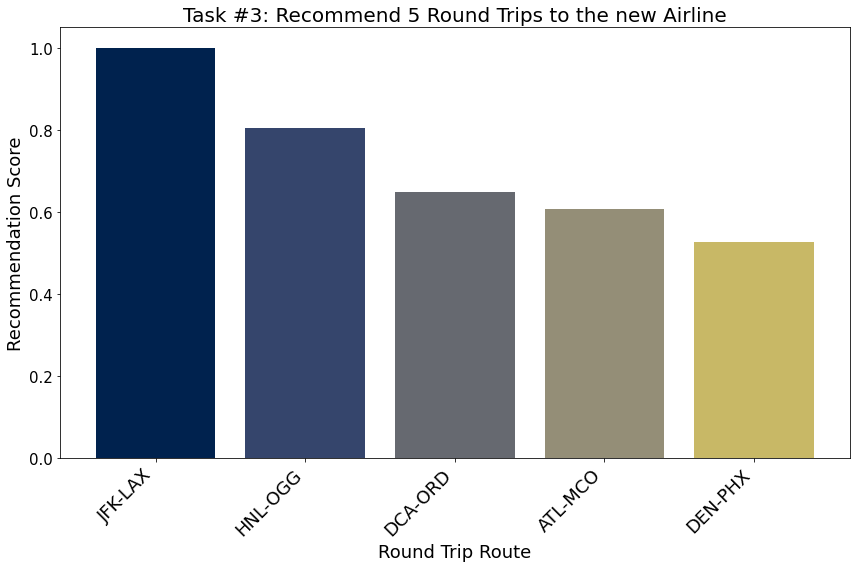

In [131]:
bar_chart(recommend_5_flights_df['STANDARDIZED_ROUTE'],\
          recommend_5_flights_df['RECCOMENDATION_METRIC'],\
          'Task #3: Recommend 5 Round Trips to the new Airline',\
          'Round Trip Route',\
          'Recommendation Score',\
          'cividis')

## Task 4 <br>
**The number of round trip flights it will take to breakeven on the upfront airplane cost for
each of the 5 round trip routes that you recommend. Print key summary components for
these routes.**<br>

### Assumptions to answer question
 - Assumming this new airline will have the below items the same as their competition
     - Costs
         - Departure delays
         - Arrival delays
         - Per-mile operation costs (fuel, insurance, maintnence, etc.)
     - Revenue
         - Itinerary fare rates
         - Occupancy rates
         - Customer baggage rate and fare

In [132]:
recommend_5_flights_df

,STANDARDIZED_ROUTE,PER_MILE_COST_sum,LANDING_COST_sum,DEP_DELAY_COST_sum,ARR_DELAY_COST_sum,BAGGAGE_REVENUE_sum,ITIN_REVENUE_sum,PASSENGERS_sum,OCCUPANCY_RATE_mean,INFERRED_PASSENGERS,INFERRED_ITIN_REVENUE,FLIGHT_COUNT,TOTAL_REVENUE_M,TOTAL_COST_M,TOTAL_PROFIT_M,PUNCTUALITY,PUNCTUALITY_NORM,PROFITABILITY,RECCOMENDATION_METRIC
3,JFK-LAX,1.435936e+08,63200000,4053225,4102575,14376827.5,3639036,5400,0.646843,821694.0,439263957.0,3158,453.640784,214.949360,238.691424,2582.583914,0.614962,1.000000,1.000000
6,HNL-OGG,4.400892e+06,35945000,400575,458025,10864175.0,449593,2349,0.648241,620950.0,163802286.0,2395,174.666461,41.204492,133.461969,358.496868,1.000000,0.348915,0.804930
22,DCA-ORD,2.075910e+07,36950000,3050700,3323700,8377390.0,636422,1348,0.646757,478814.0,241564138.0,1847,249.941528,64.083501,185.858027,3451.218192,0.464582,0.673105,0.650054
8,ATL-MCO,1.745695e+07,47070000,1779450,1776000,10697540.0,673062,2372,0.647097,611424.0,179428144.0,2351,190.125684,68.082395,122.043289,1512.313909,0.800249,0.278264,0.606667
14,DEN-PHX,2.172412e+07,39310000,1835550,1765950,8947750.0,1088846,3632,0.650890,511404.0,169151775.0,1965,178.099525,64.635621,113.463904,1832.824427,0.744762,0.225181,0.527062


In [139]:
# get profit per flight for each of the 5

recommend_5_flights_df['PROFIT_PER_FLIGHT'] = ((recommend_5_flights_df['TOTAL_PROFIT_M']\
                                      / recommend_5_flights_df['FLIGHT_COUNT']) * 1000000)


recommend_5_flights_df['FLIGHTS_TO_RECOUP_INVESTMENT'] = np.ceil(90000000 / \
                                                                 recommend_5_flights_df['PROFIT_PER_FLIGHT'])\
                                                                 .astype('int32')




In [140]:
recommend_5_flights_df

,STANDARDIZED_ROUTE,PER_MILE_COST_sum,LANDING_COST_sum,DEP_DELAY_COST_sum,ARR_DELAY_COST_sum,BAGGAGE_REVENUE_sum,ITIN_REVENUE_sum,PASSENGERS_sum,OCCUPANCY_RATE_mean,INFERRED_PASSENGERS,...,TOTAL_COST_M,TOTAL_PROFIT_M,PUNCTUALITY,PUNCTUALITY_NORM,PROFITABILITY,RECCOMENDATION_METRIC,PROFIT_PER_FLIGHT,FLIGHTS_TO_RECOOP_INVESTMENT,FLIGHTS_TO_RECOuP_INVESTMENT,FLIGHTS_TO_RECOUP_INVESTMENT
3,JFK-LAX,1.435936e+08,63200000,4053225,4102575,14376827.5,3639036,5400,0.646843,821694.0,...,214.949360,238.691424,2582.583914,0.614962,1.000000,1.000000,75583.098322,1191,1191,1191
6,HNL-OGG,4.400892e+06,35945000,400575,458025,10864175.0,449593,2349,0.648241,620950.0,...,41.204492,133.461969,358.496868,1.000000,0.348915,0.804930,55725.248017,1616,1616,1616
22,DCA-ORD,2.075910e+07,36950000,3050700,3323700,8377390.0,636422,1348,0.646757,478814.0,...,64.083501,185.858027,3451.218192,0.464582,0.673105,0.650054,100626.977152,895,895,895
8,ATL-MCO,1.745695e+07,47070000,1779450,1776000,10697540.0,673062,2372,0.647097,611424.0,...,68.082395,122.043289,1512.313909,0.800249,0.278264,0.606667,51911.224568,1734,1734,1734
14,DEN-PHX,2.172412e+07,39310000,1835550,1765950,8947750.0,1088846,3632,0.650890,511404.0,...,64.635621,113.463904,1832.824427,0.744762,0.225181,0.527062,57742.444702,1559,1559,1559


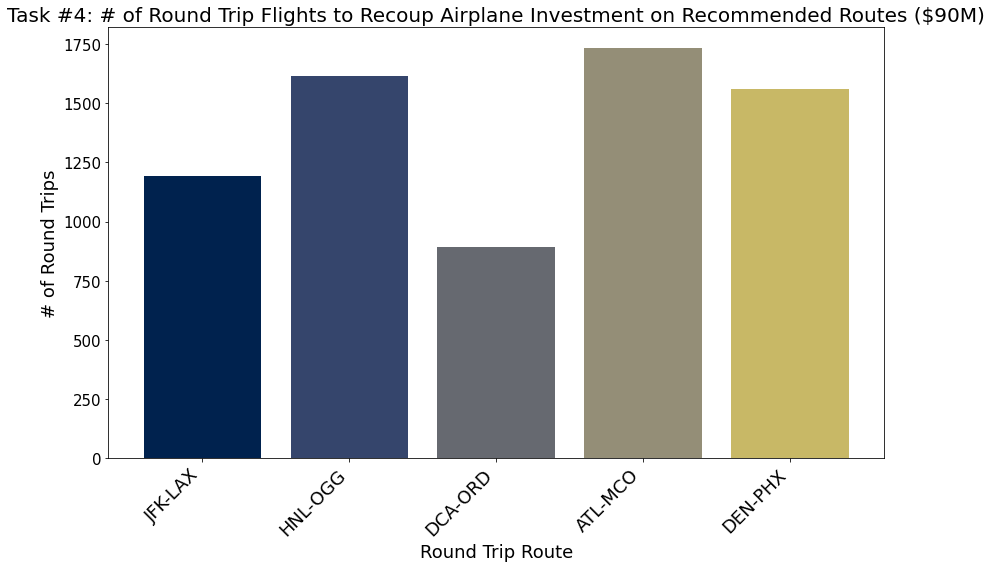

In [143]:
bar_chart(recommend_5_flights_df['STANDARDIZED_ROUTE'],\
          recommend_5_flights_df['FLIGHTS_TO_RECOUP_INVESTMENT'],\
          'Task #4: # of Round Trip Flights to Recoup Airplane Investment on Recommended Routes ($90M)',\
          'Round Trip Route',\
          '# of Round Trips',\
          'cividis')

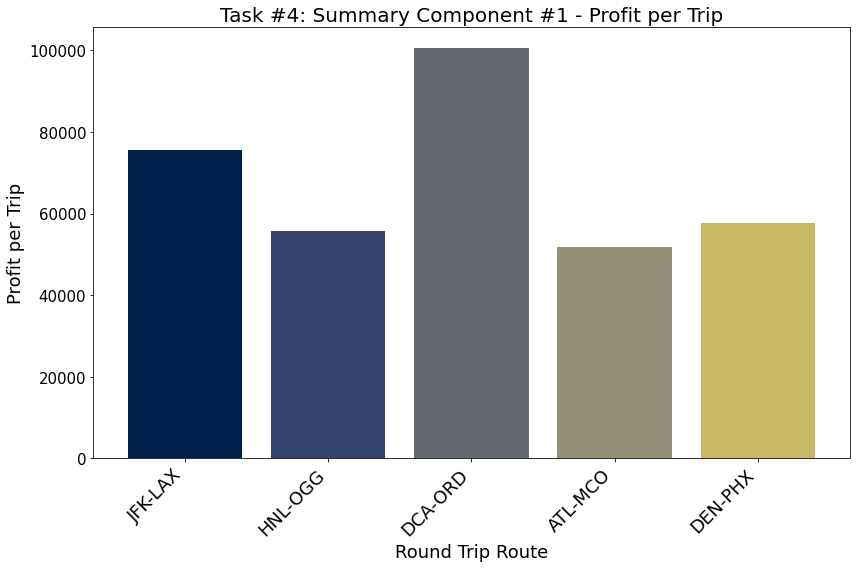

In [145]:
bar_chart(recommend_5_flights_df['STANDARDIZED_ROUTE'],\
          recommend_5_flights_df['PROFIT_PER_FLIGHT'],\
          'Task #4: Summary Component #1 - Profit per Trip',\
          'Round Trip Route',\
          'Profit per Trip',\
          'cividis')

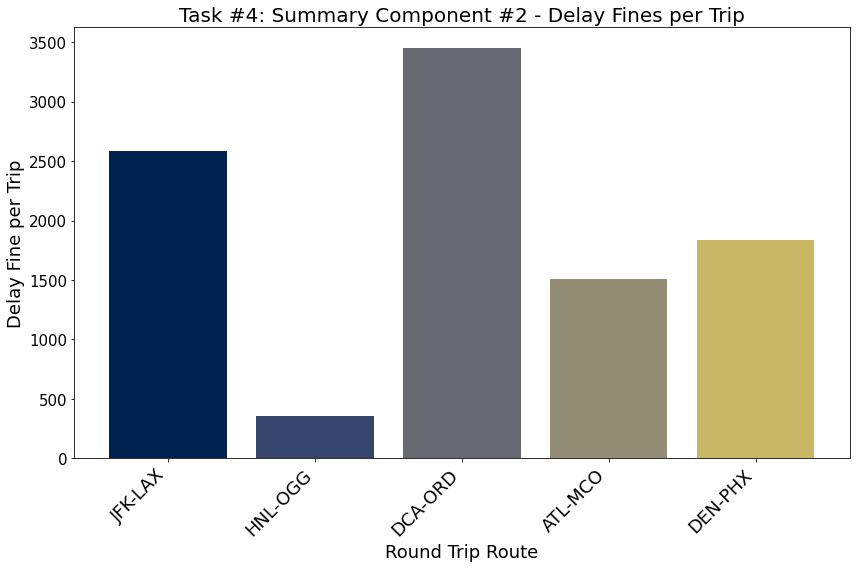

In [149]:
bar_chart(recommend_5_flights_df['STANDARDIZED_ROUTE'],\
          recommend_5_flights_df['PUNCTUALITY'],\
          'Task #4: Summary Component #2 - Delay Fines per Trip',\
          'Round Trip Route',\
          'Delay Fine per Trip',\
          'cividis')

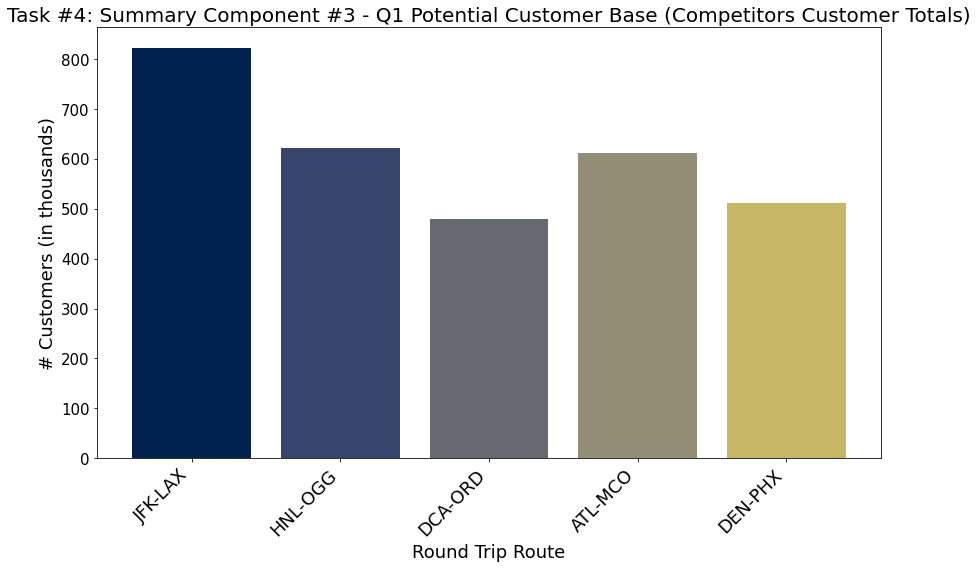

In [156]:
bar_chart(recommend_5_flights_df['STANDARDIZED_ROUTE'],\
          (recommend_5_flights_df['INFERRED_PASSENGERS'] / 1000),\
          'Task #4: Summary Component #3 - Q1 Potential Customer Base (Competitors Customer Totals)',\
          'Round Trip Route',\
          '# Customers (in thousands)',\
          'cividis')